# The seaborn.objects interface
The seaborn.objects namespace was introduced in version 0.12 as a completely new interface for making seaborn plots. It offers a more consistent and flexible API, comprising a collection of composable classes for transforming and plotting data. In contrast to the existing seaborn functions, the new interface aims to support end-to-end plot specification and customization without dropping down to matplotlib

## Specifying a plot and mapping data

In [1]:
import seaborn.objects as so
import seaborn as sns

penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

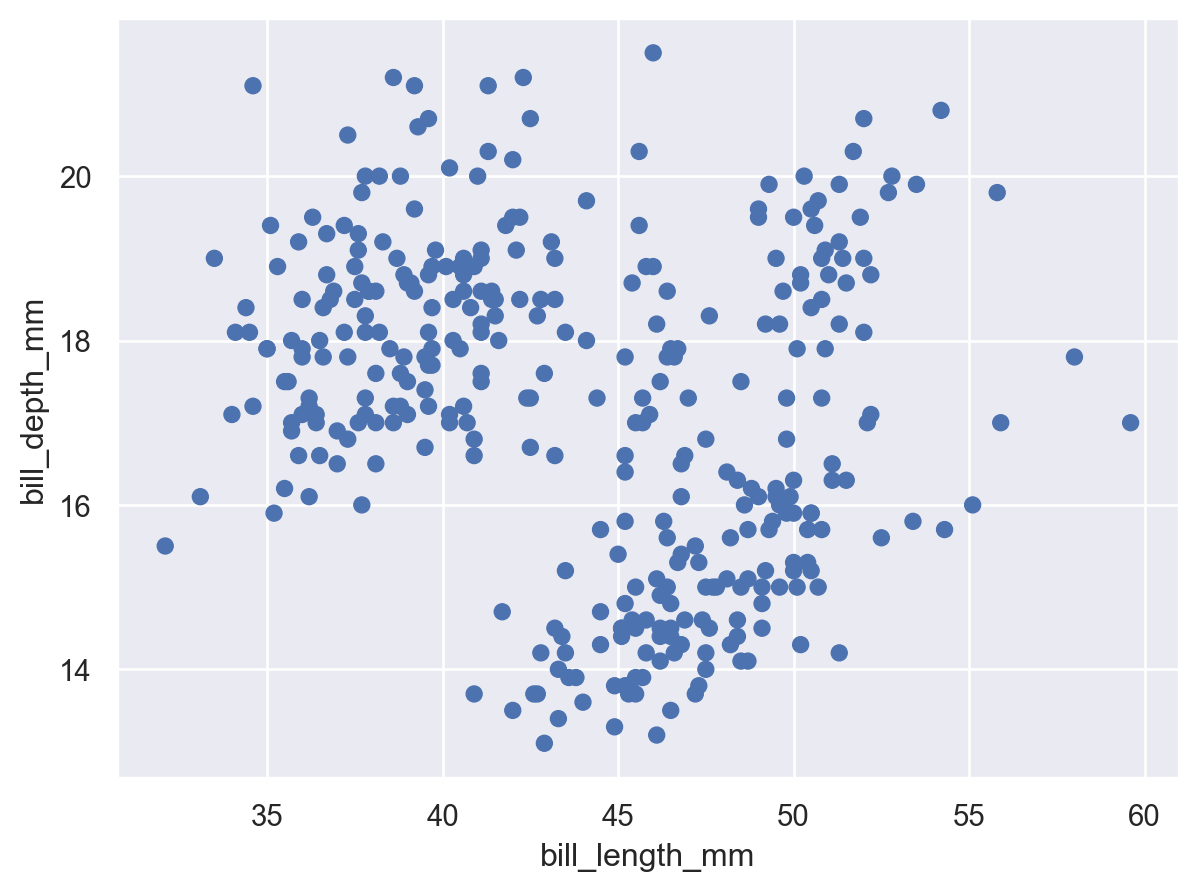

In [2]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

### Setting properties
The Dot class is an example of a Mark: an object that graphically represents data values. Each mark will have a number of properties that can be set to change its appearance

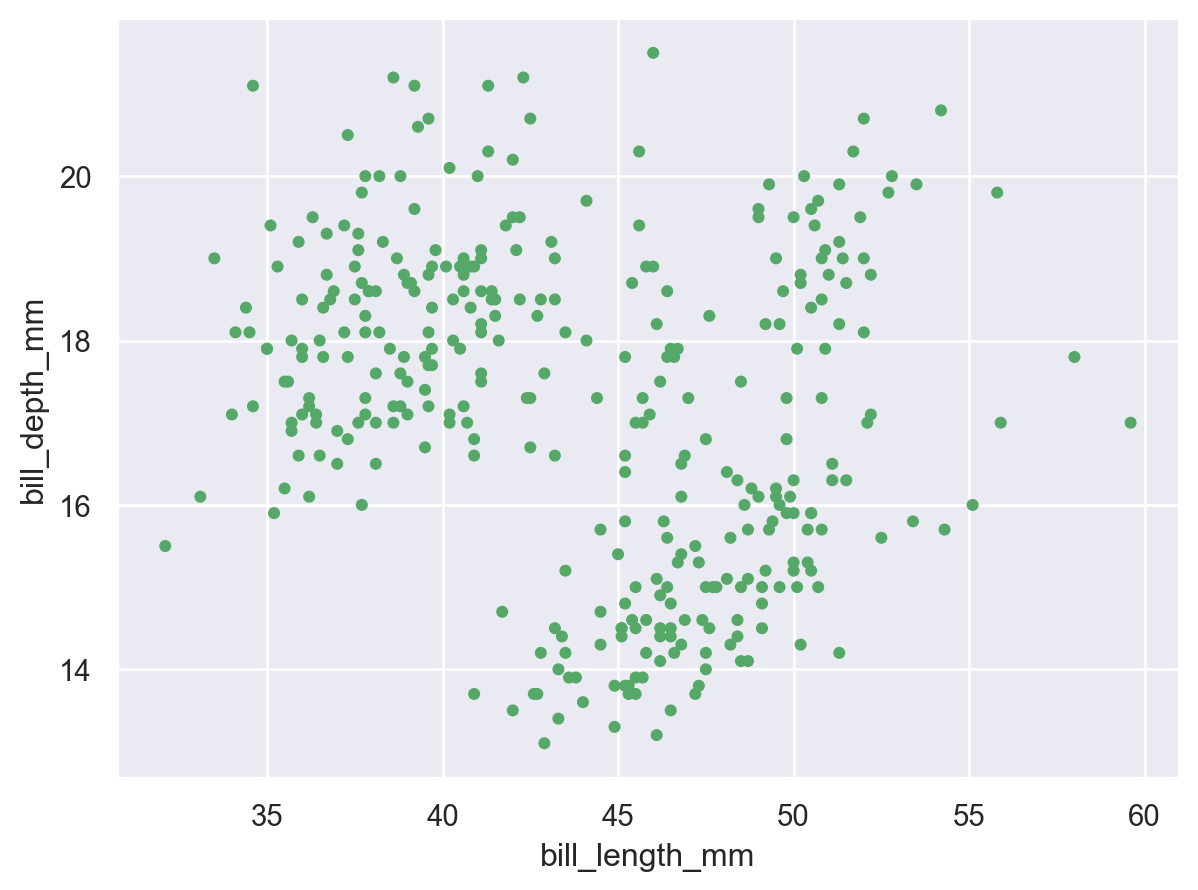

In [3]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

### Mapping properties
As with seaborn’s functions, it is also possible to map data values to various graphical properties

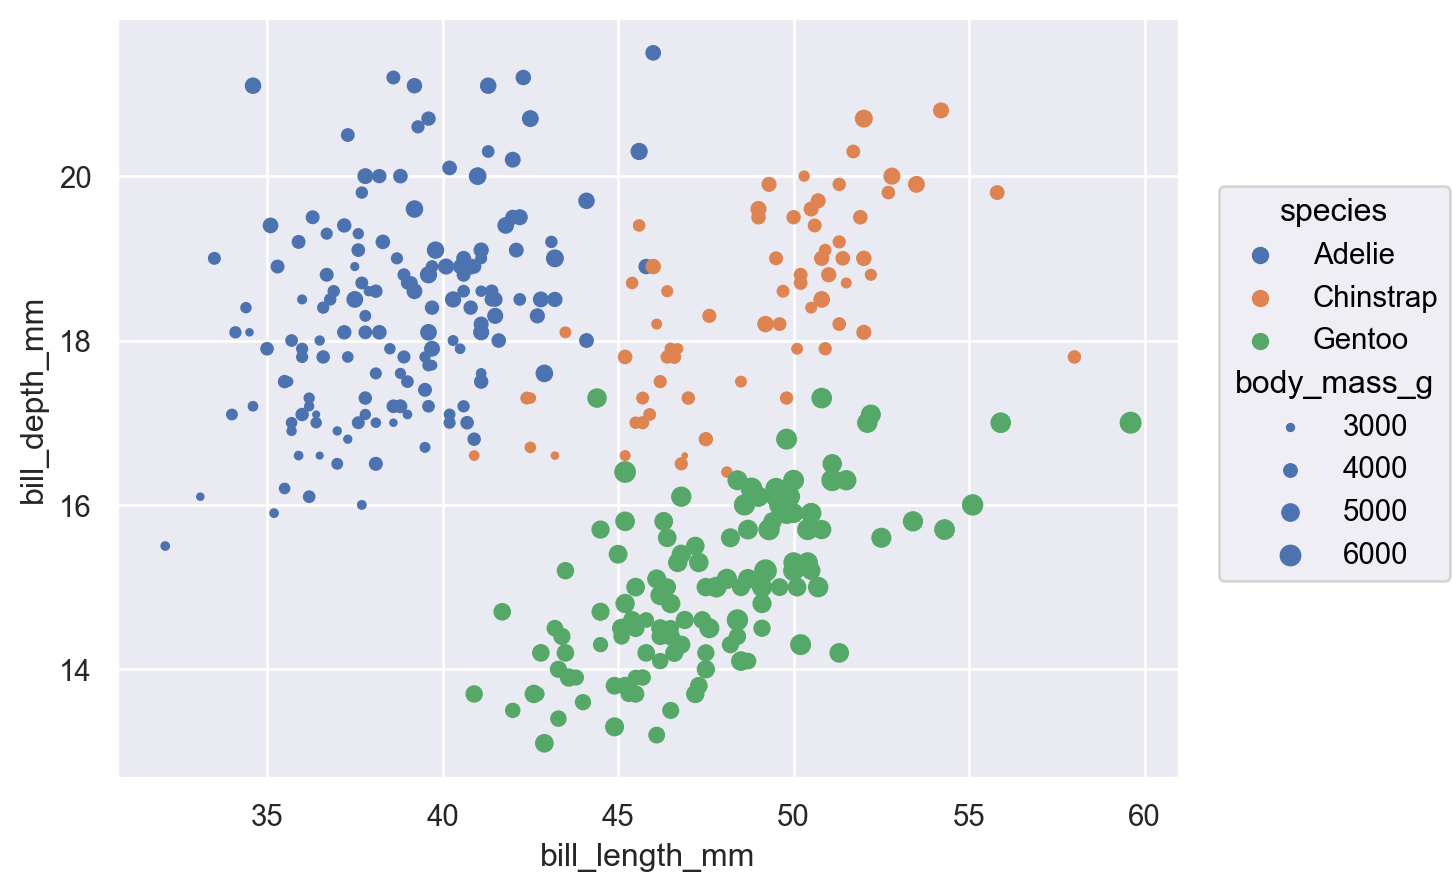

In [4]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

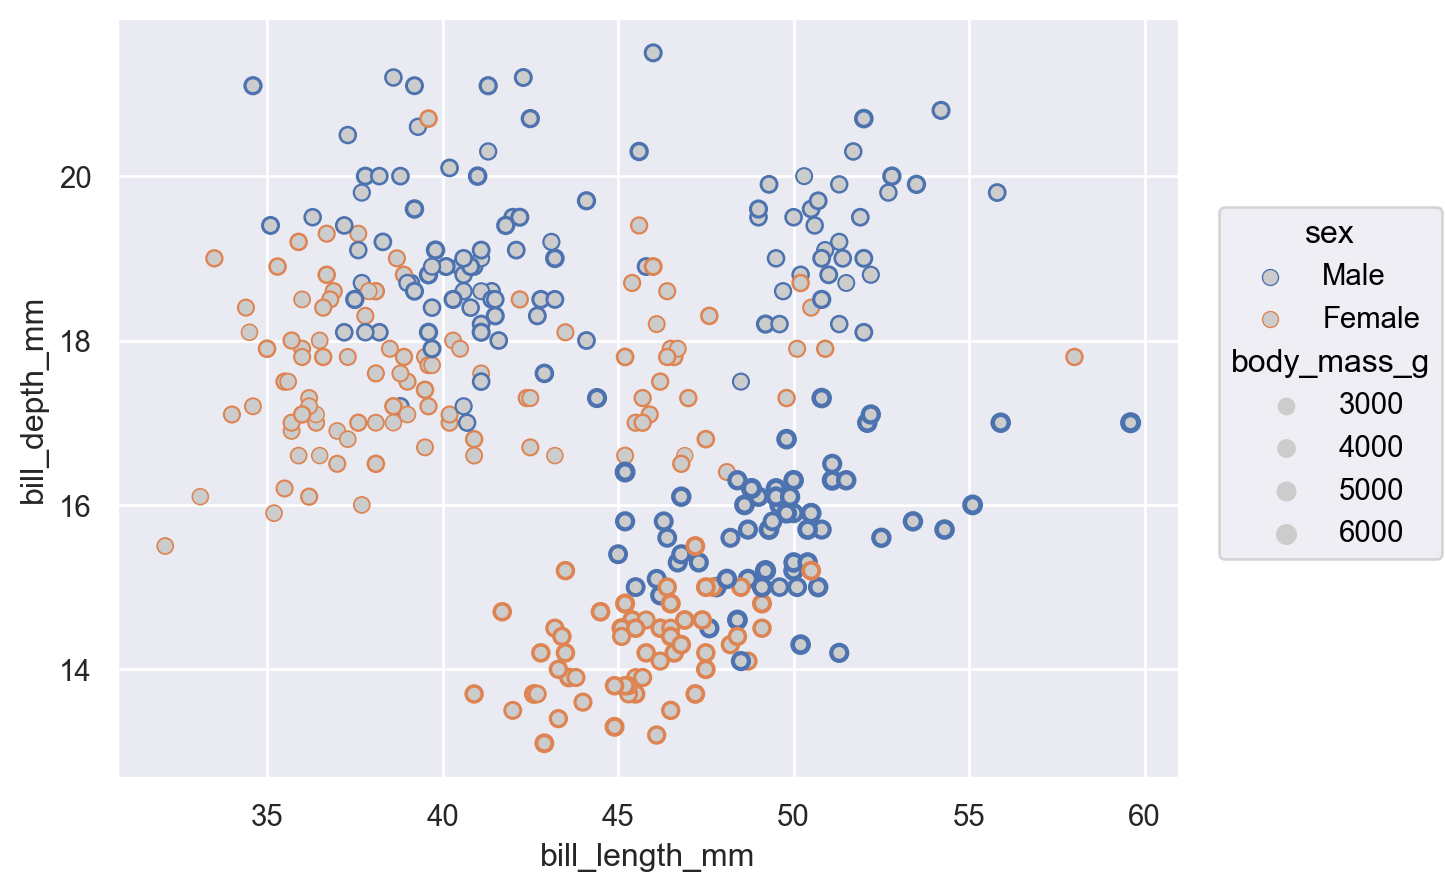

In [5]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

## Statistical transformation
As with many seaborn functions, the objects interface supports statistical transformations. These are performed by Stat objects, such as Agg

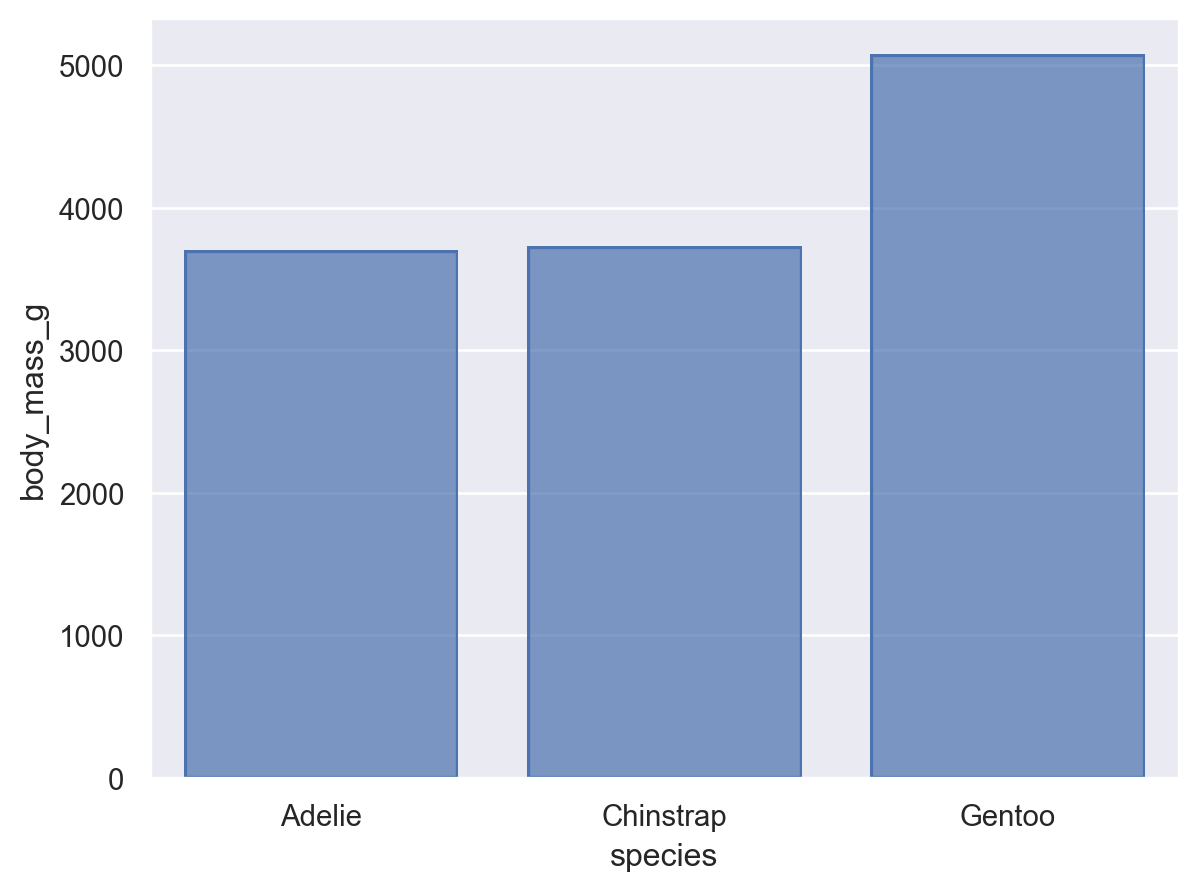

In [6]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

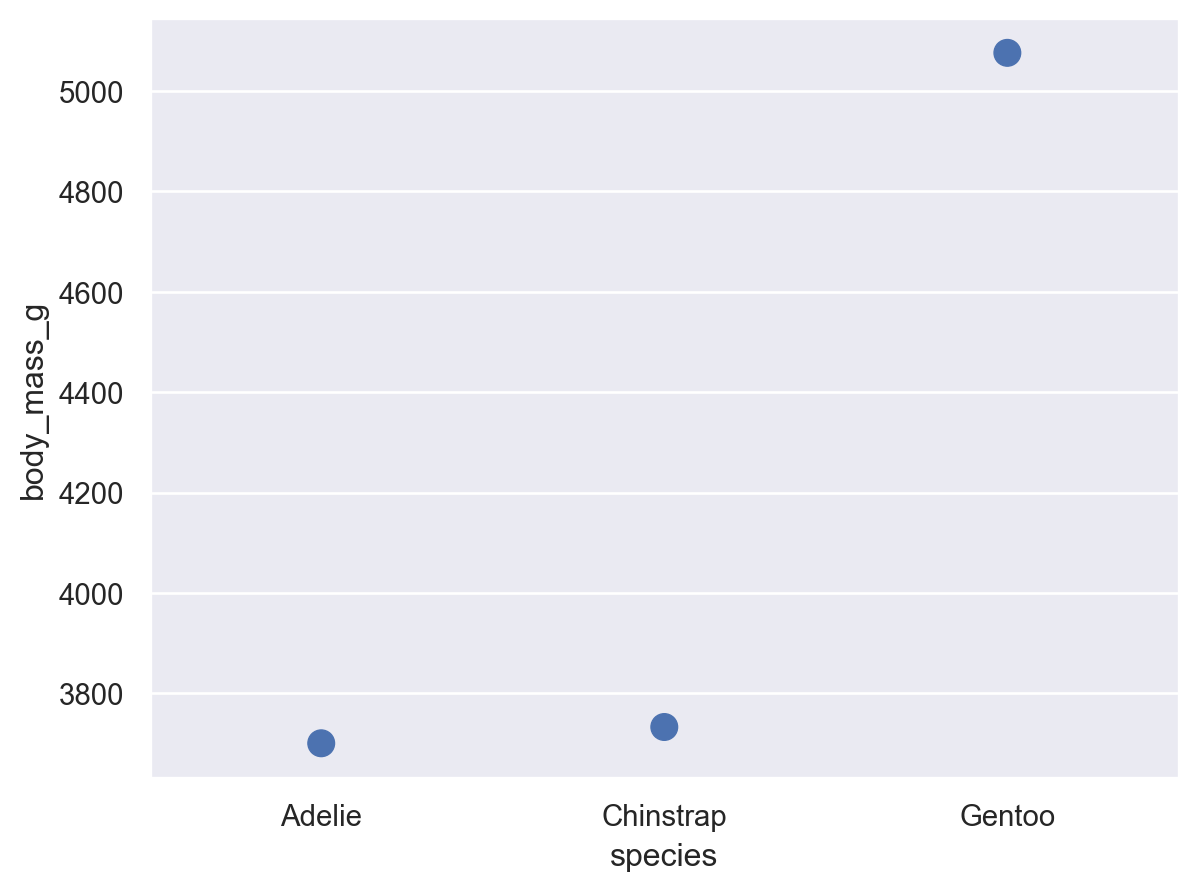

In [7]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=10), so.Agg())
)

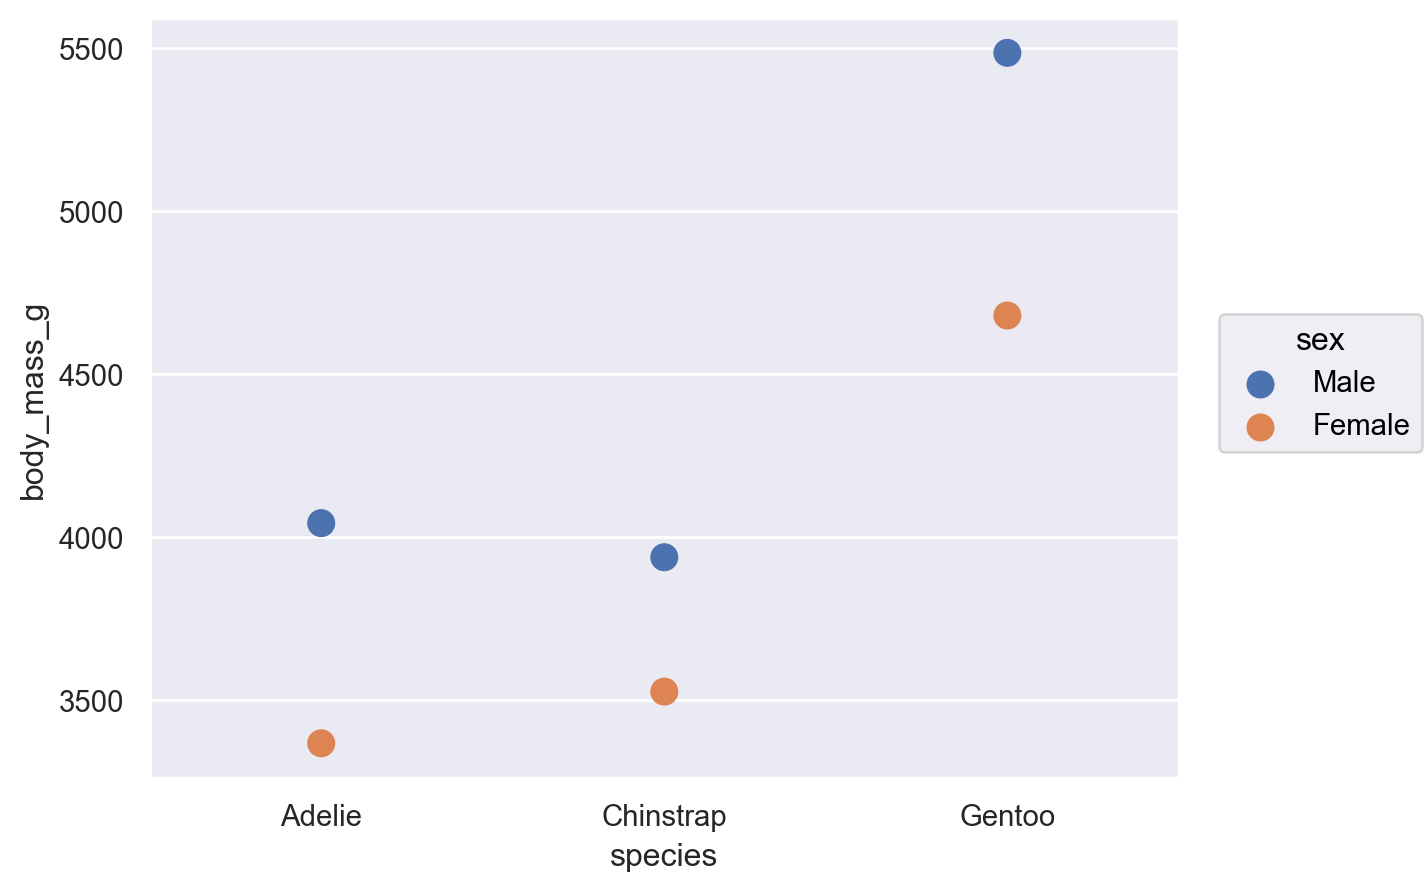

In [8]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(pointsize=10), so.Agg())
)

### Resolving overplotting
Some seaborn functions also have mechanisms that automatically resolve overplotting, as when seaborn.barplot() “dodges” bars once hue is assigned. The objects interface has less complex default behavior. Bars representing multiple groups will overlap by default

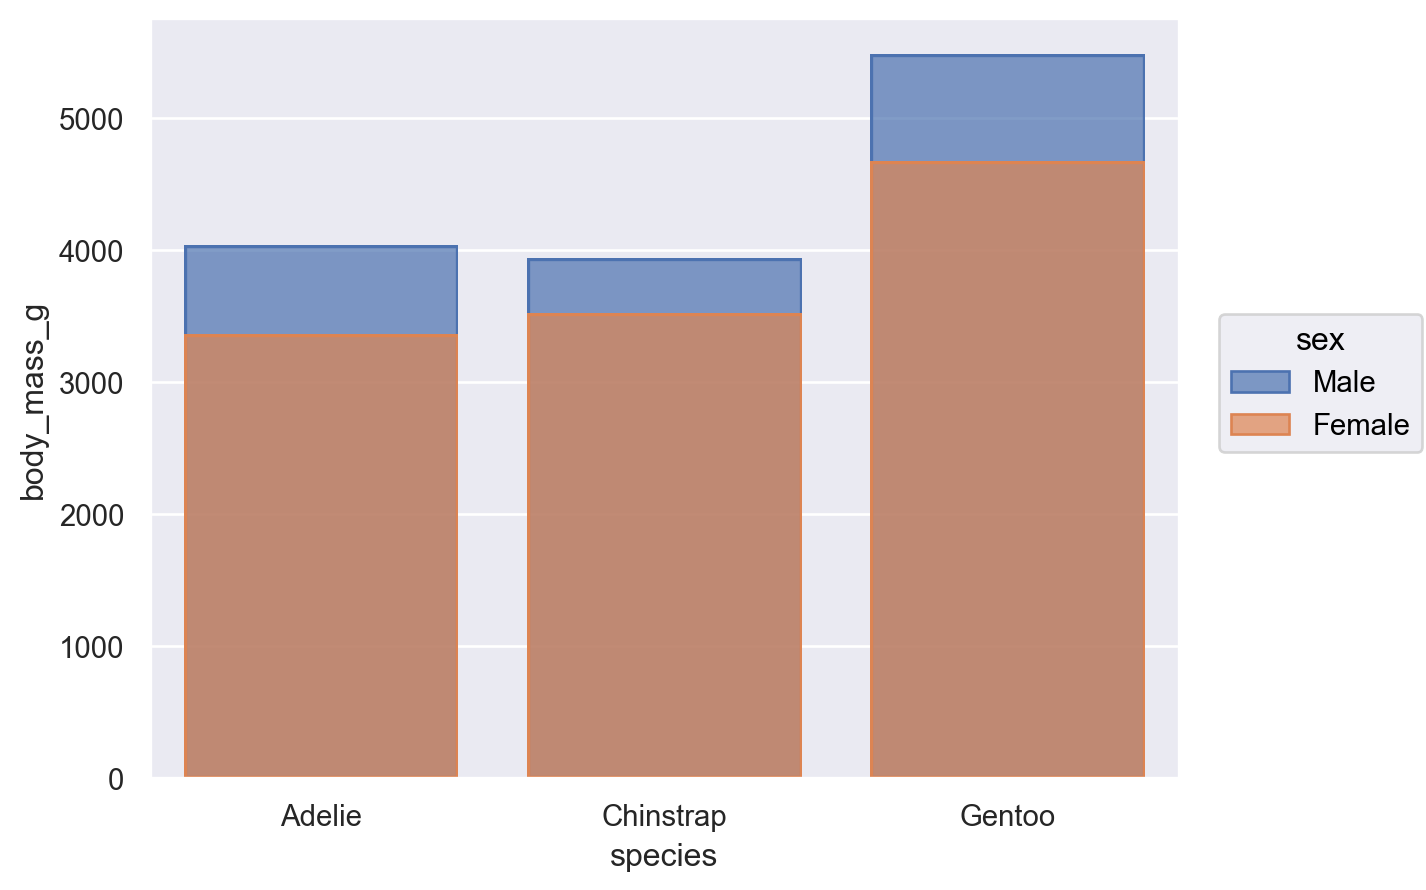

In [9]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

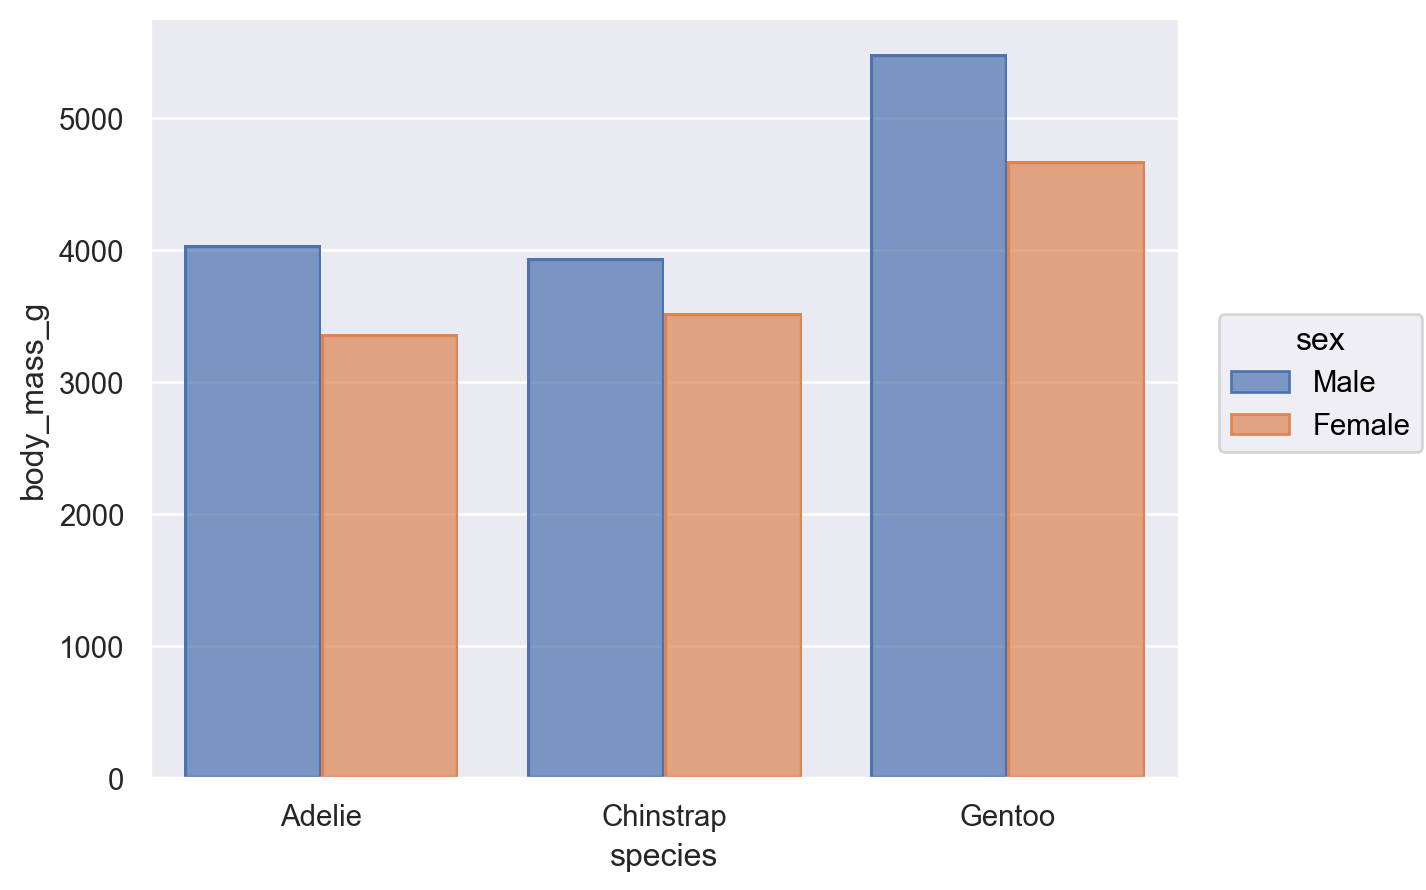

In [10]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

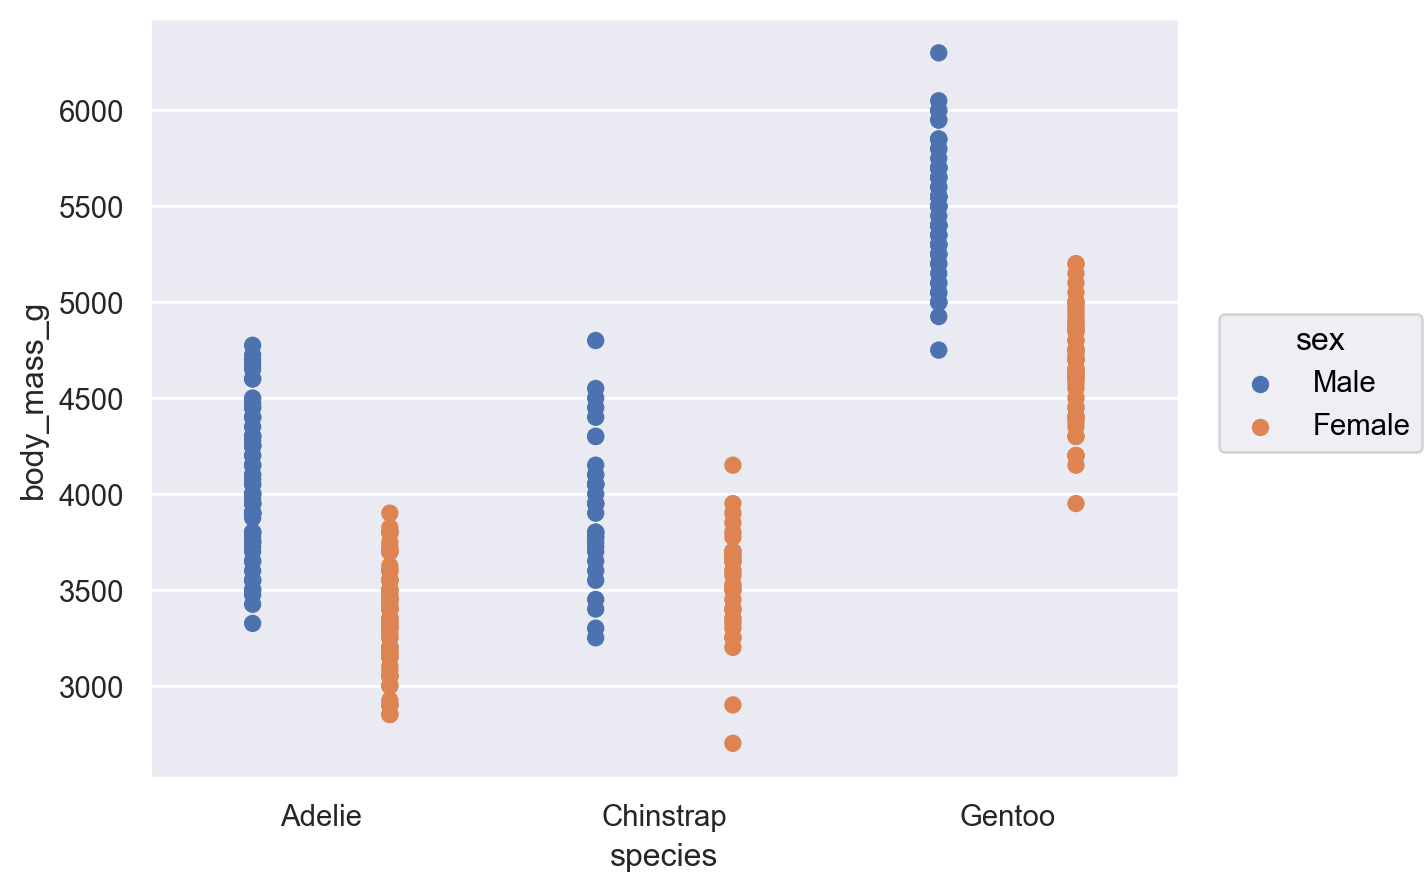

In [11]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

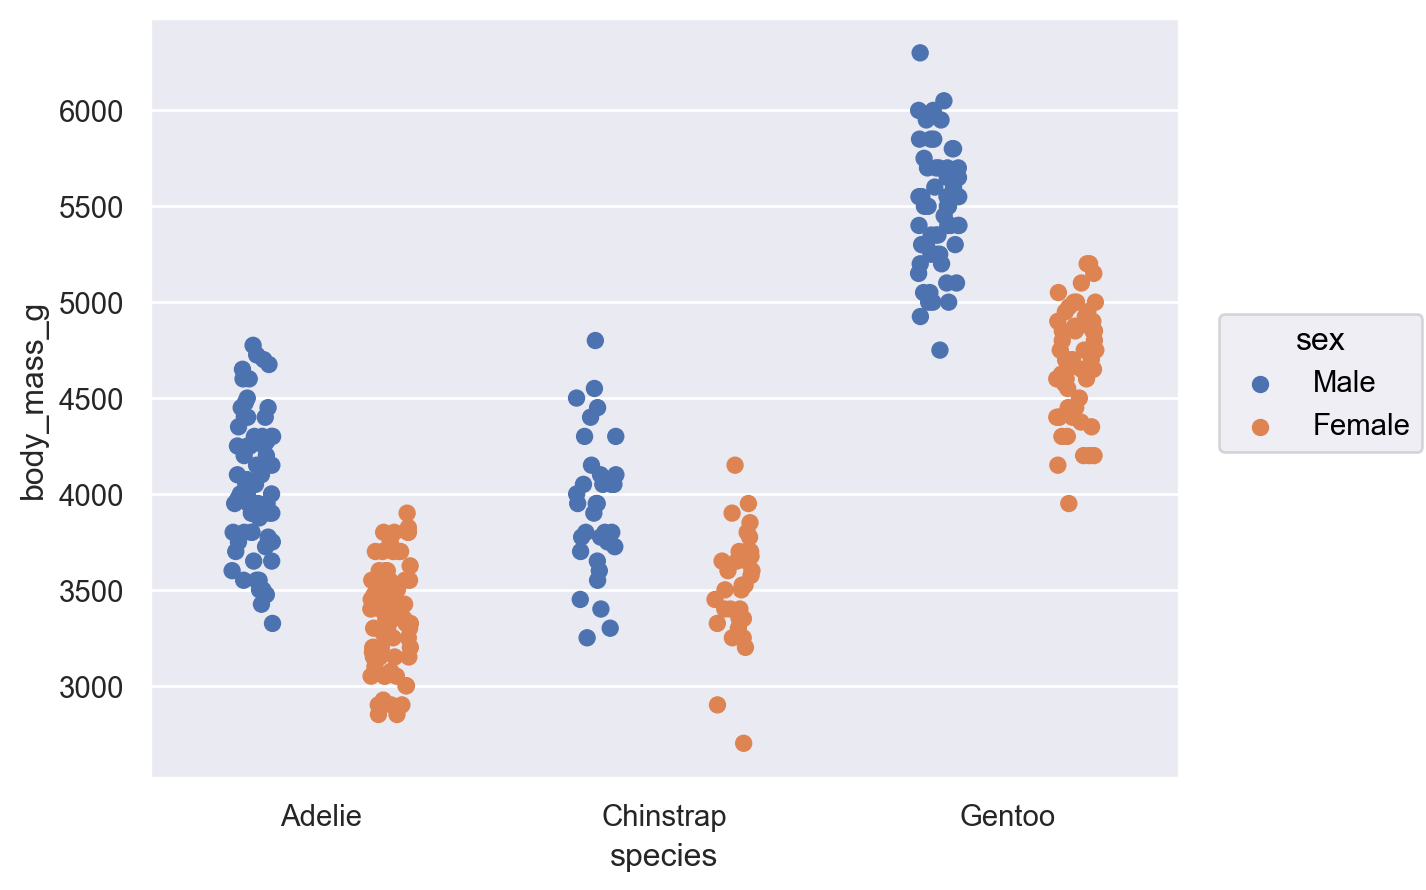

In [12]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

### Creating variables through transformation
The Agg stat requires both x and y to already be defined, but variables can also be created through statistical transformation. For example, the Hist stat requires only one of x or y to be defined, and it will create the other by counting observations

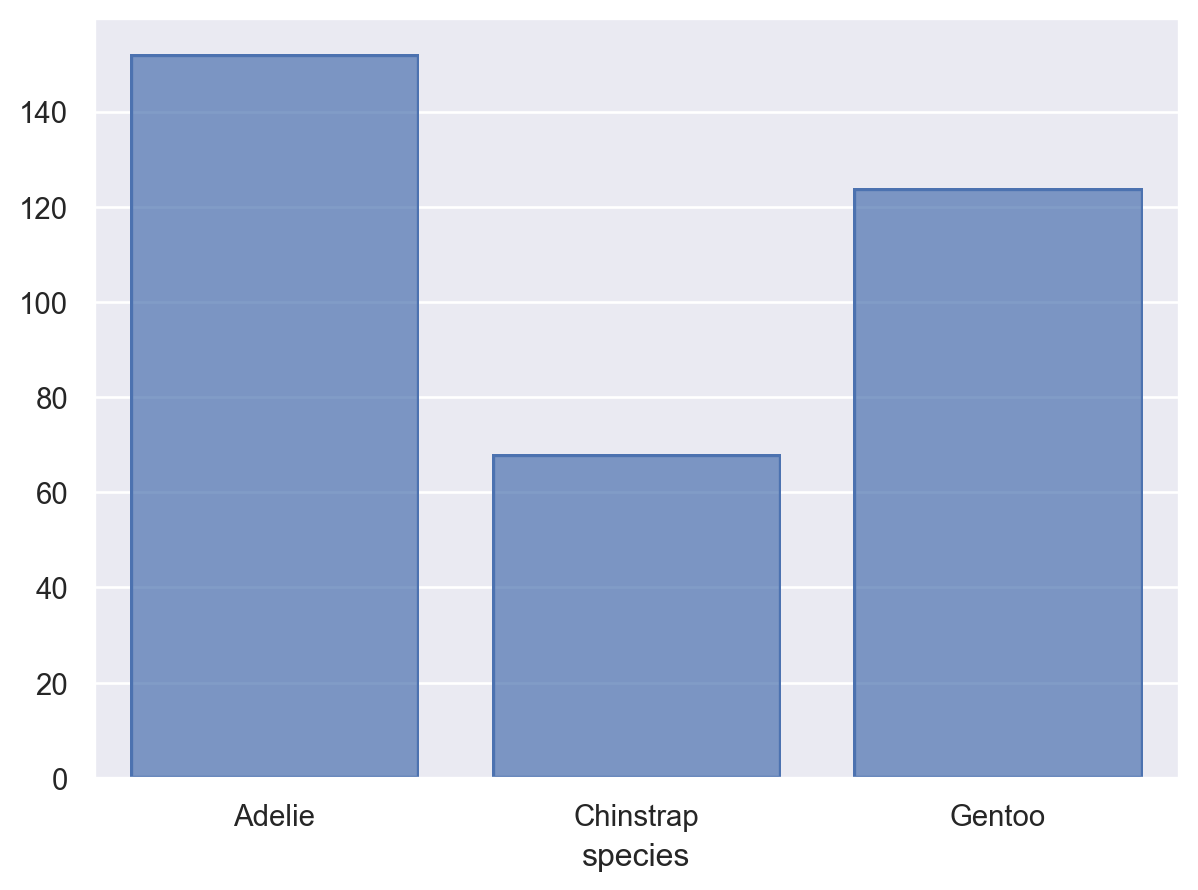

In [13]:
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Hist())
)

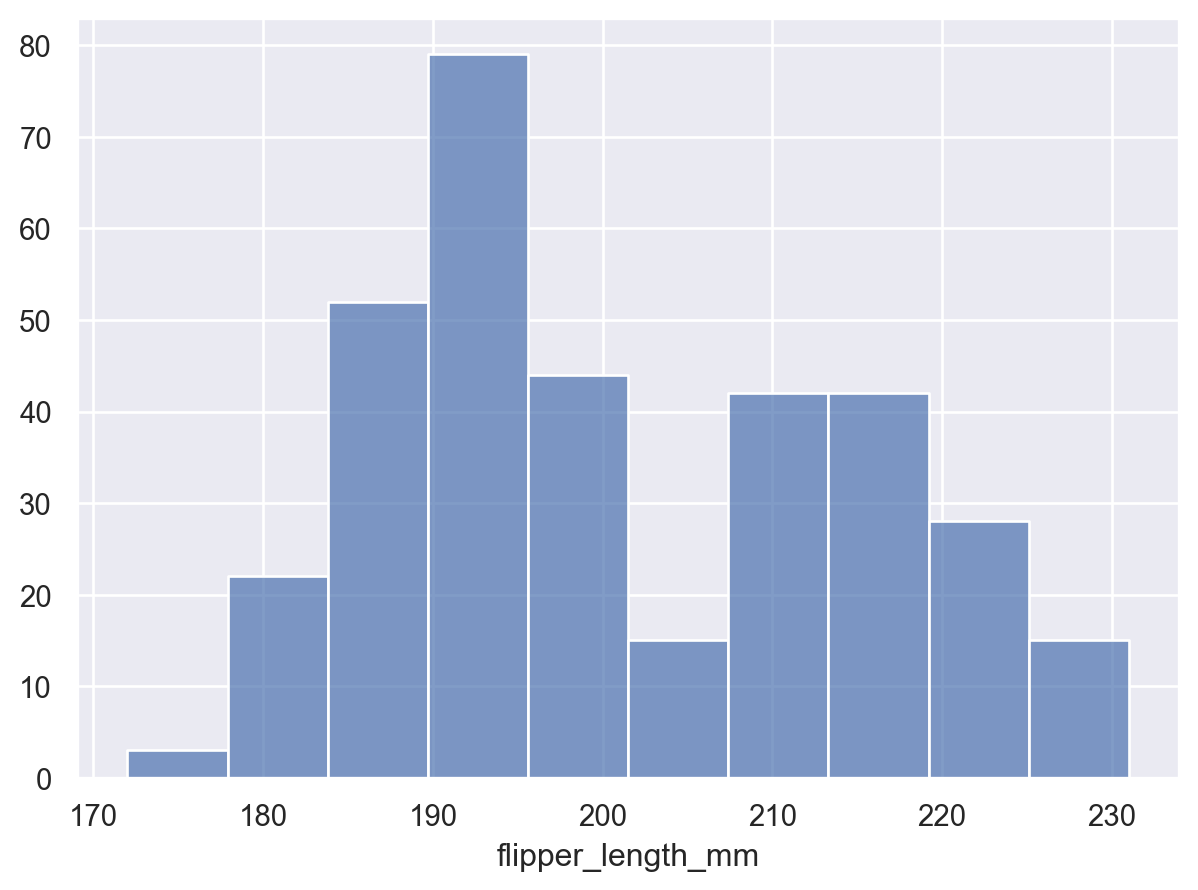

In [14]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .add(so.Bars(), so.Hist())
)

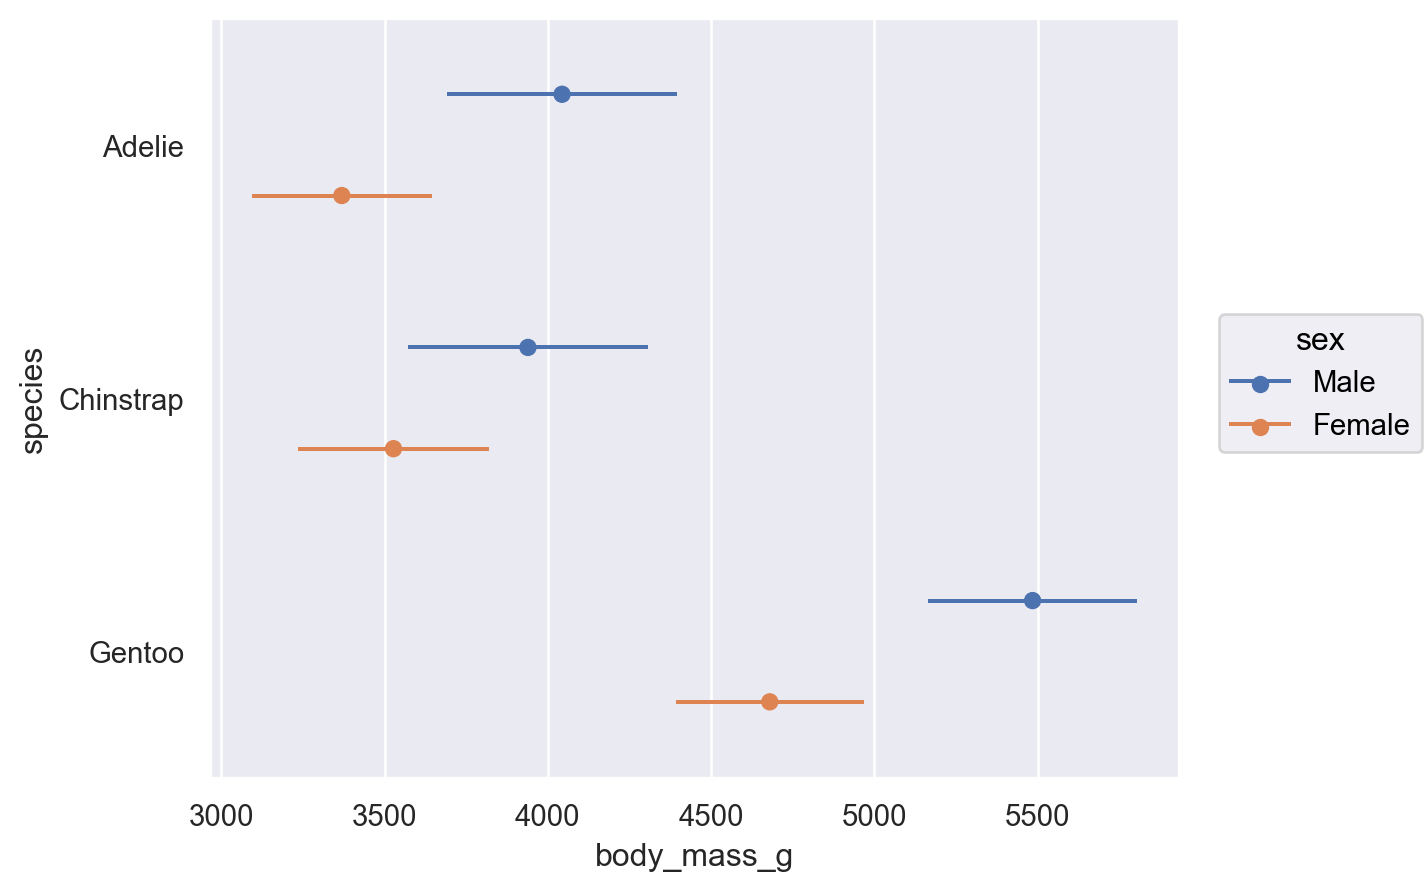

In [15]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
    .add(so.Dot(), so.Agg(), so.Dodge())
)

### Orienting marks and transforms
When aggregating, dodging, and drawing a bar, the x and y variables are treated differently. Each operation has the concept of an orientation. The Plot tries to determine the orientation automatically based on the data types of the variables. For instance, if we flip the assignment of species and body_mass_g, we’ll get the same plot, but oriented horizontally

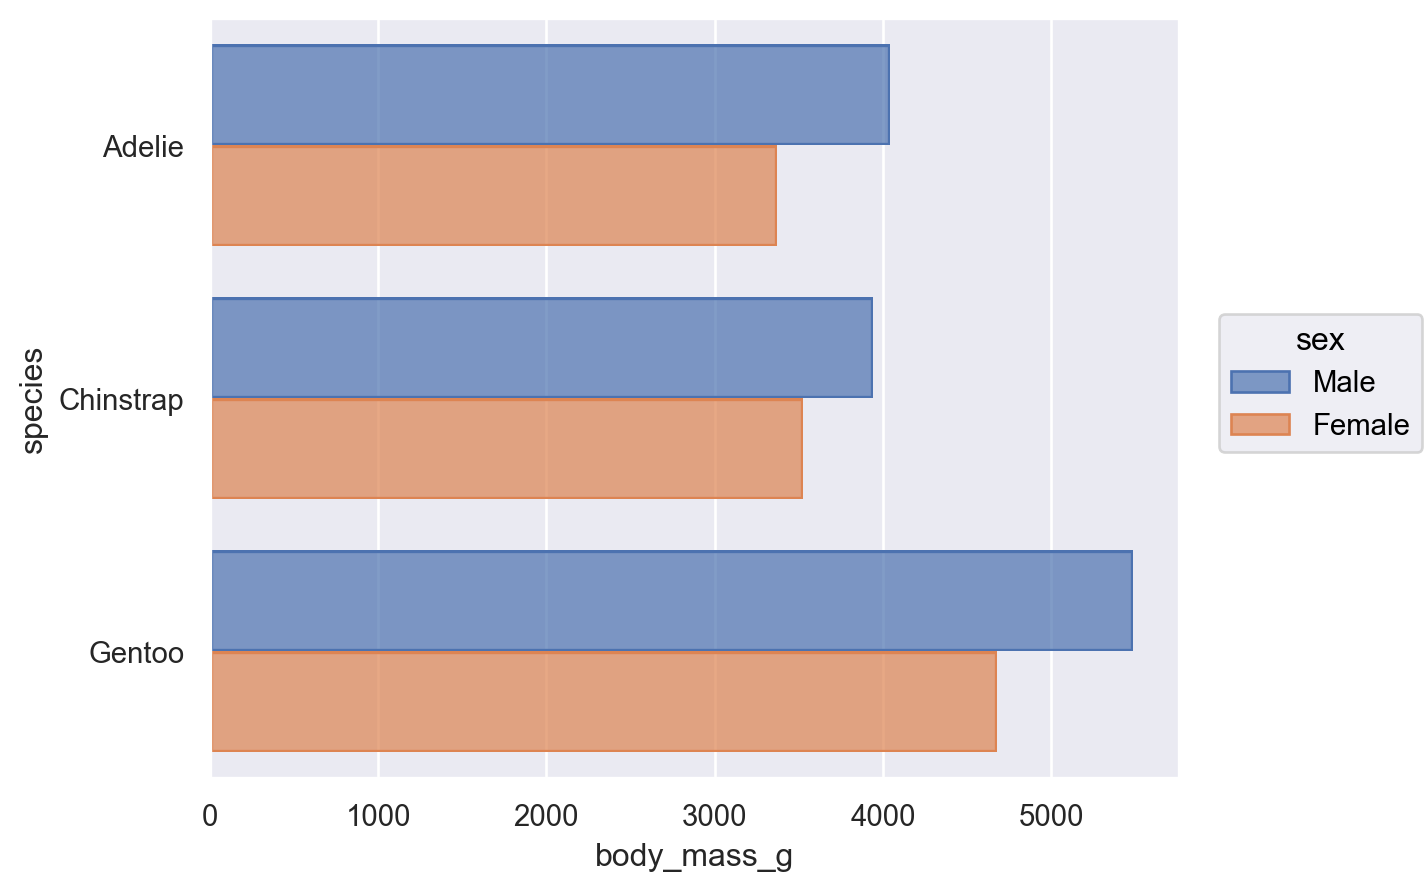

In [16]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

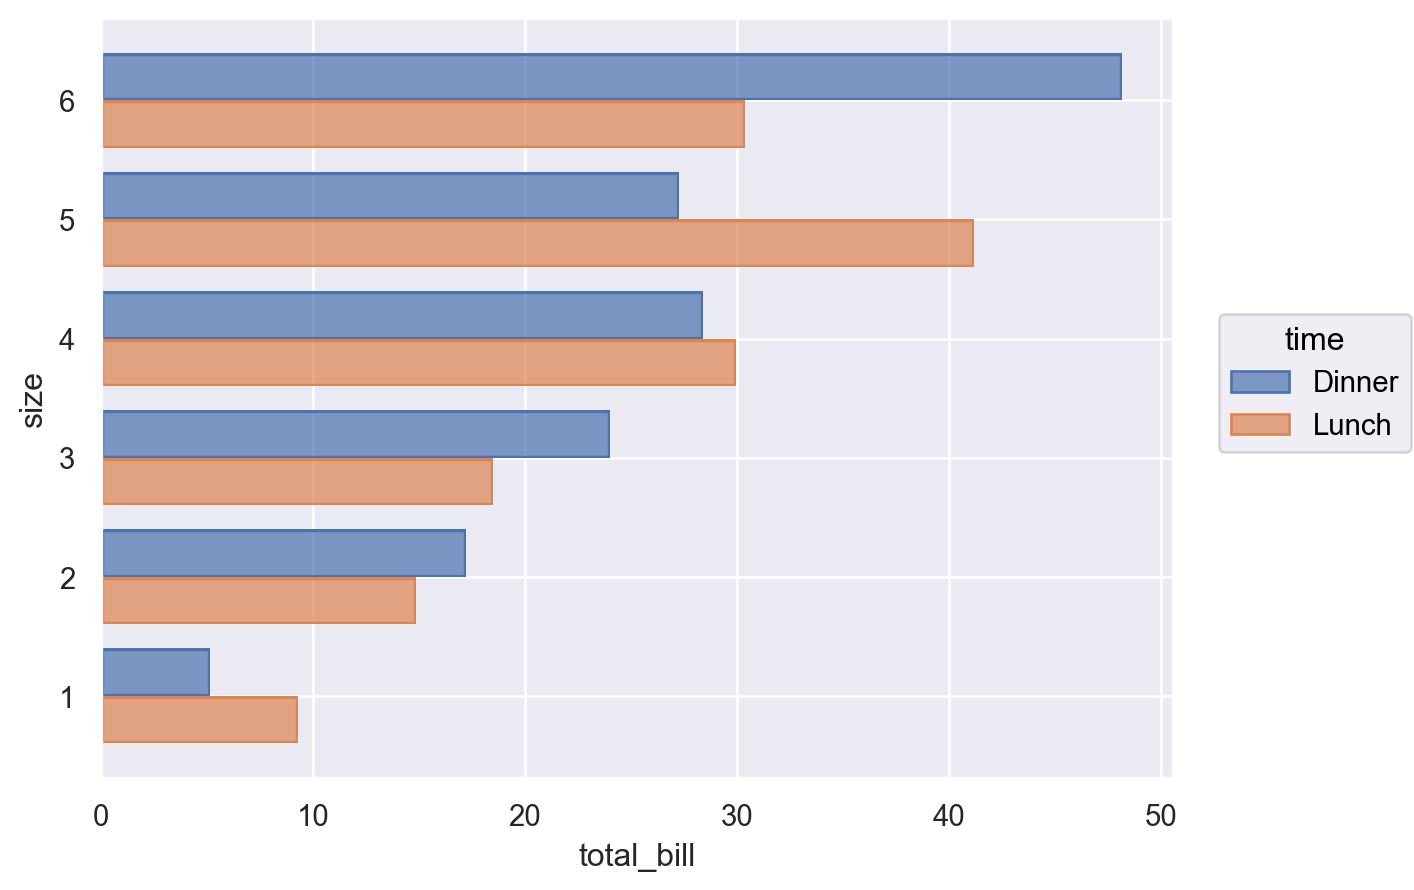

In [17]:
(
    so.Plot(tips, x="total_bill", y="size", color="time")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient="y")
)

## Building and displaying the plot
Most examples this far have produced a single subplot with just one kind of mark on it. But Plot does not limit you to this.

### Adding multiple layers
More complex single-subplot graphics can be created by calling Plot.add() repeatedly. Each time it is called, it defines a layer in the plot. For example, we may want to add a scatterplot (now using Dots) and then a regression fit

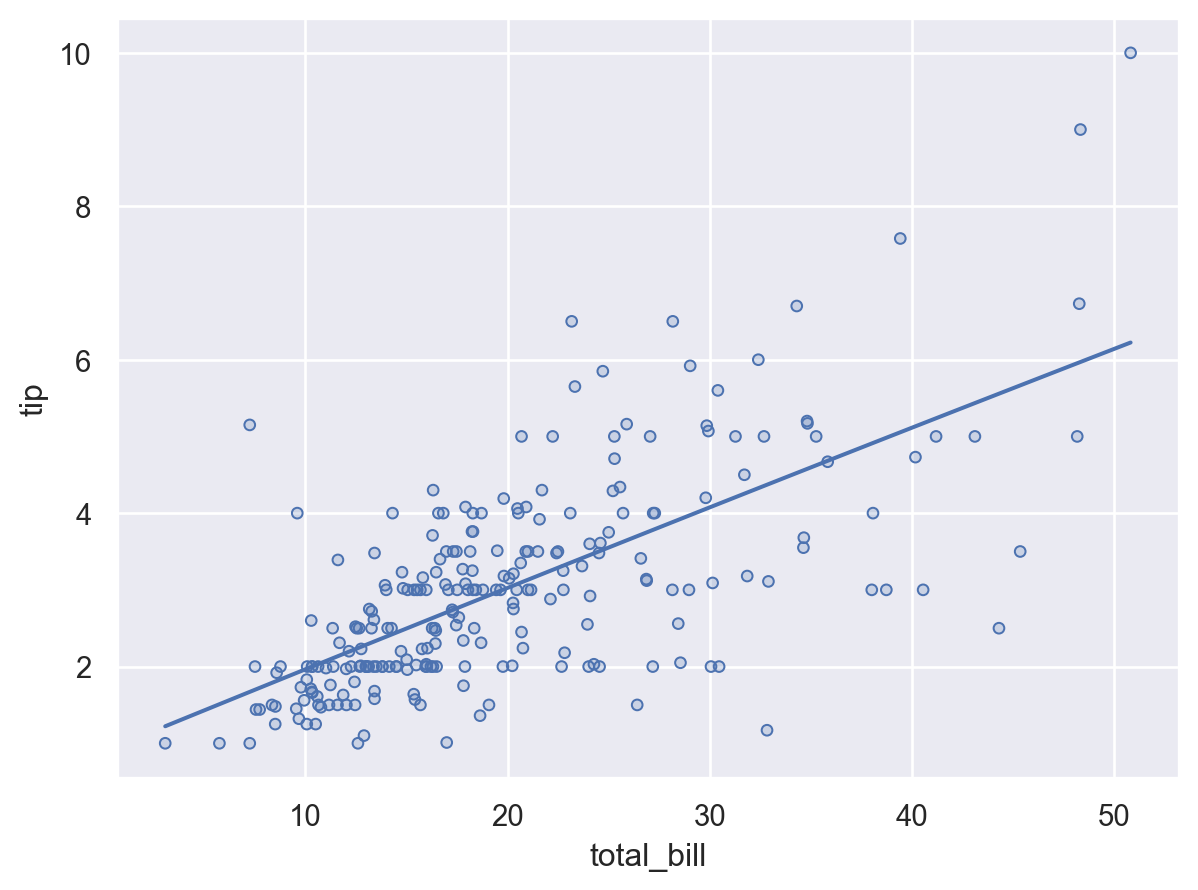

In [18]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

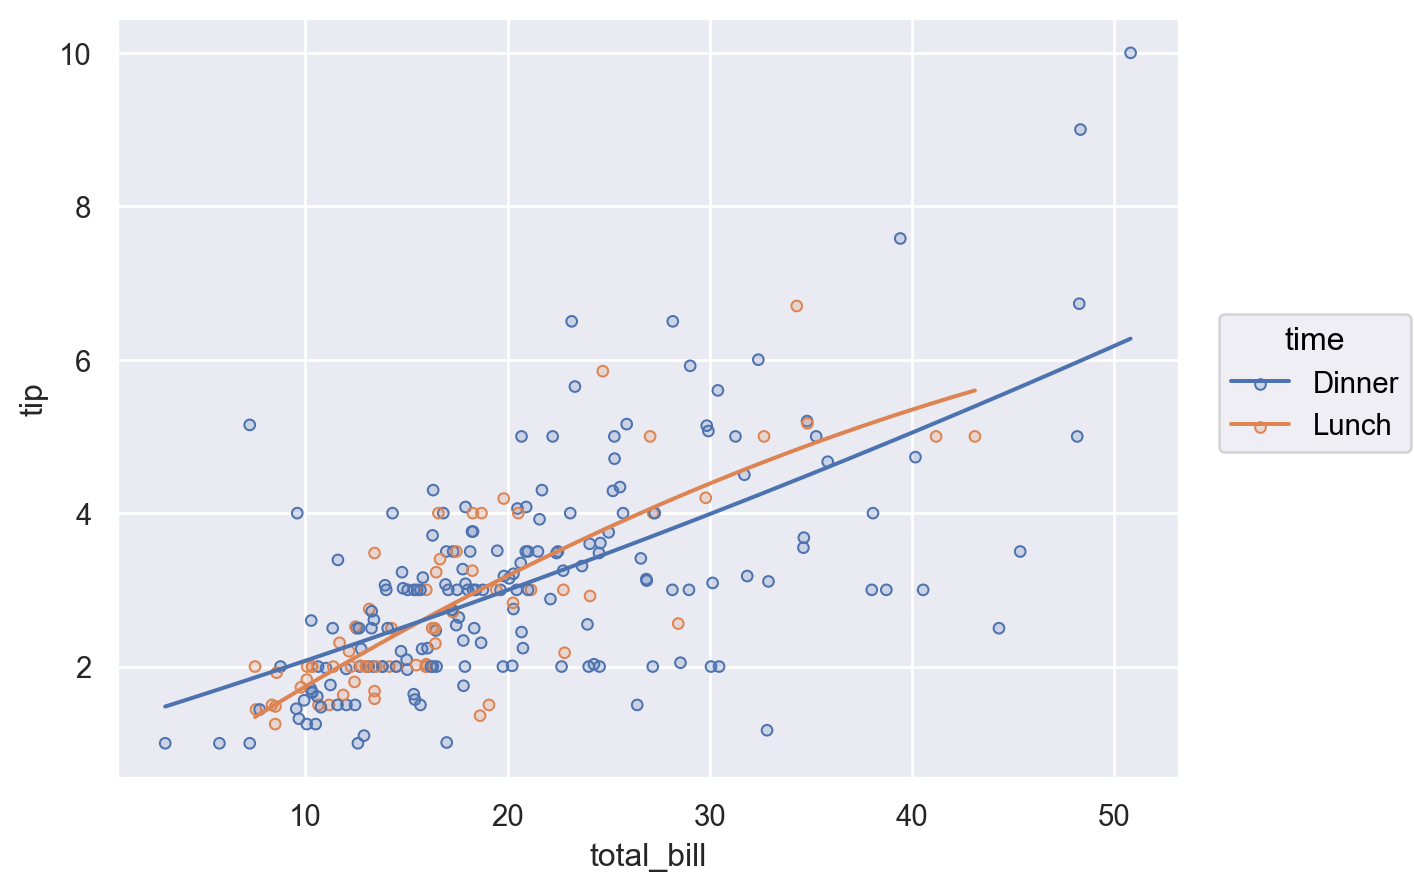

In [19]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

### Layer-specific mappings
You can also define a mapping such that it is used only in a specific layer. This is accomplished by defining the mapping within the call to Plot.add for the relevant layer

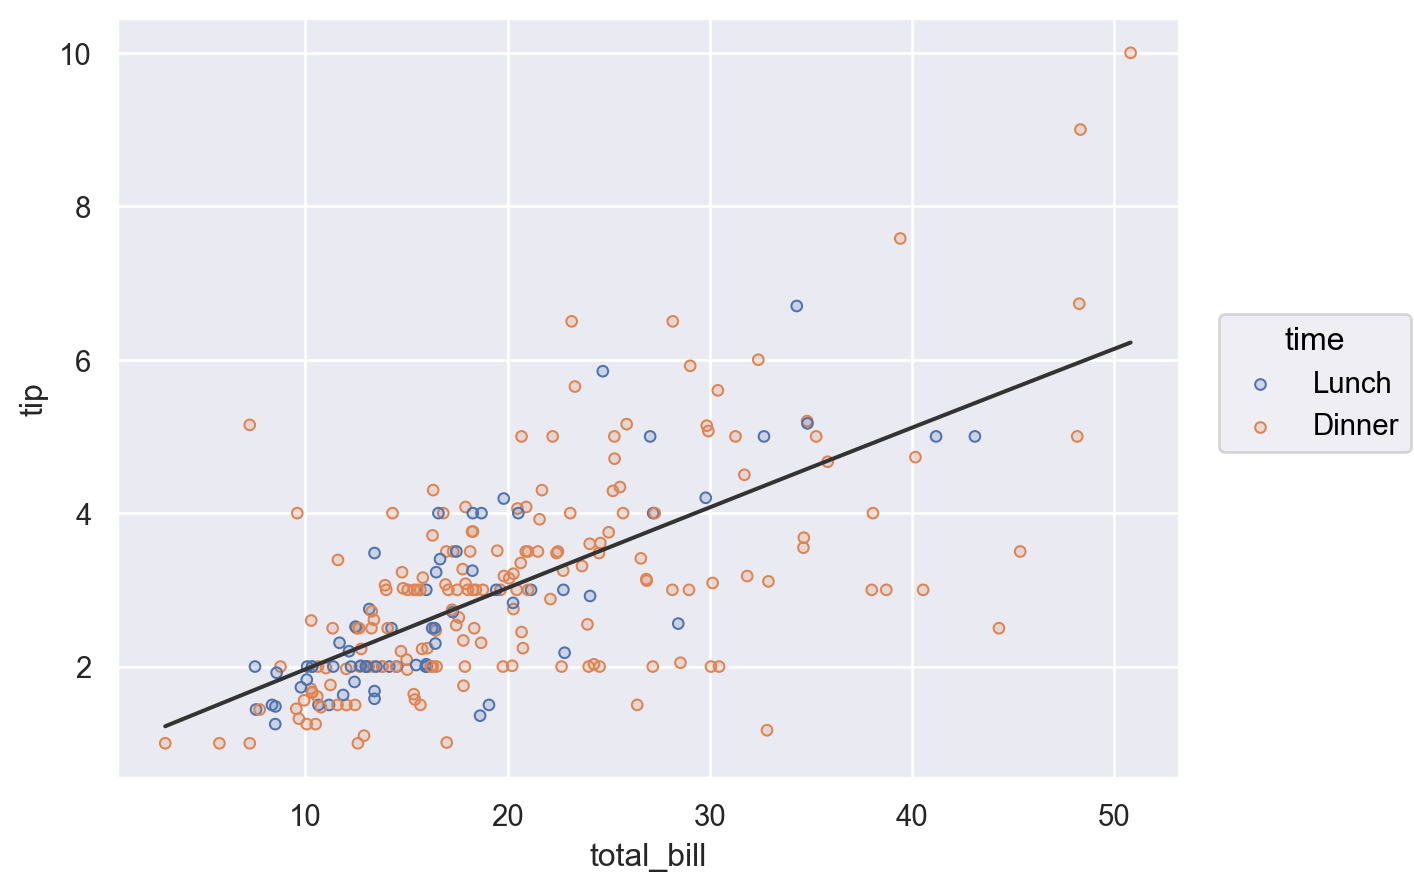

In [20]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(), color="time")
    .add(so.Line(color=".2"), so.PolyFit())
)

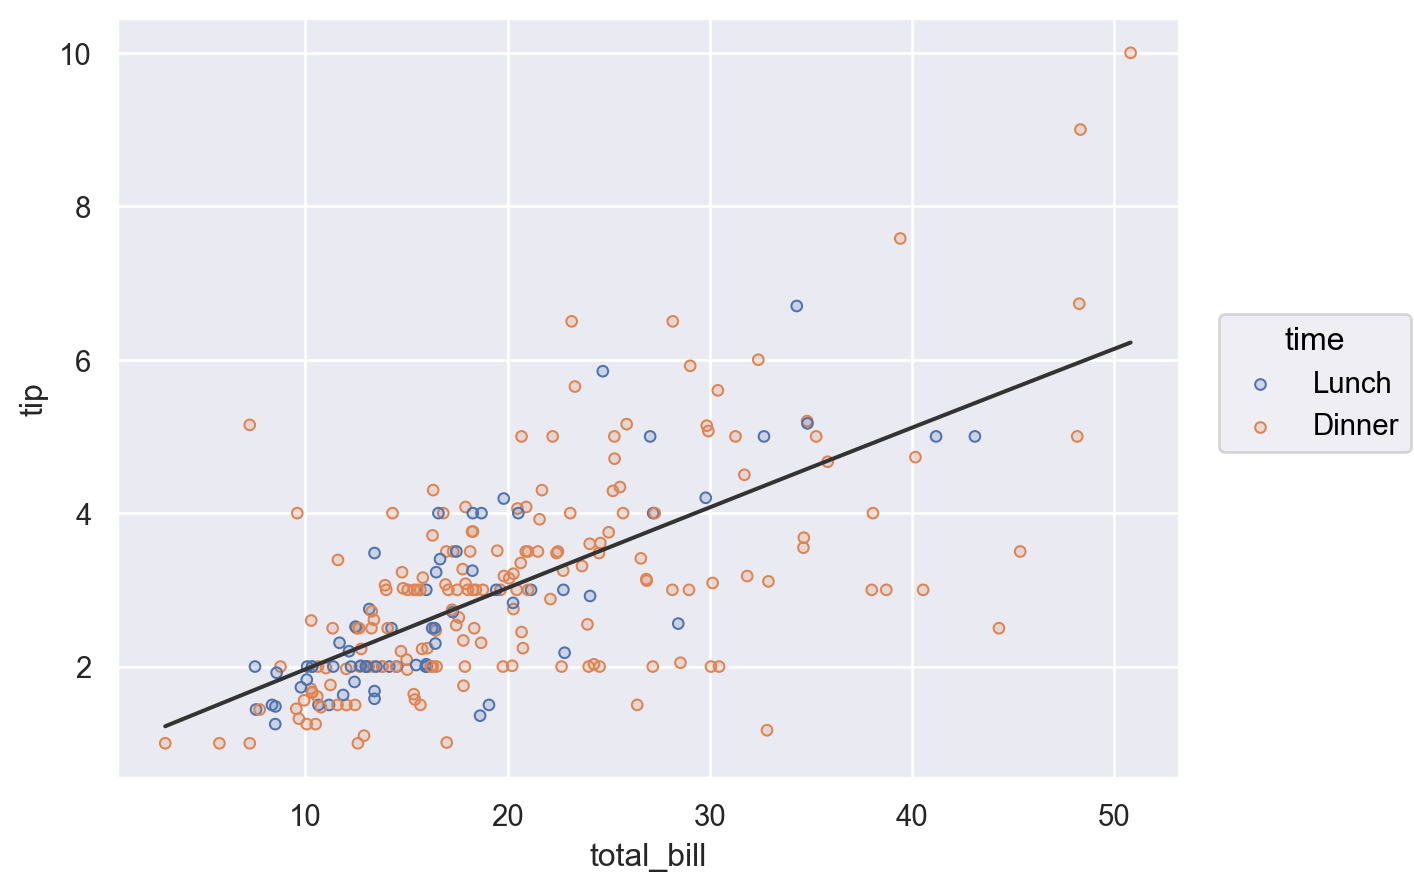

In [21]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(color=".2"), so.PolyFit(), color=None)
)

### Faceting and pairing subplots
As with seaborn’s figure-level functions (seaborn.displot(), seaborn.catplot(), etc.), the Plot interface can also produce figures with multiple “facets”, or subplots containing subsets of data. This is accomplished with the Plot.facet() method

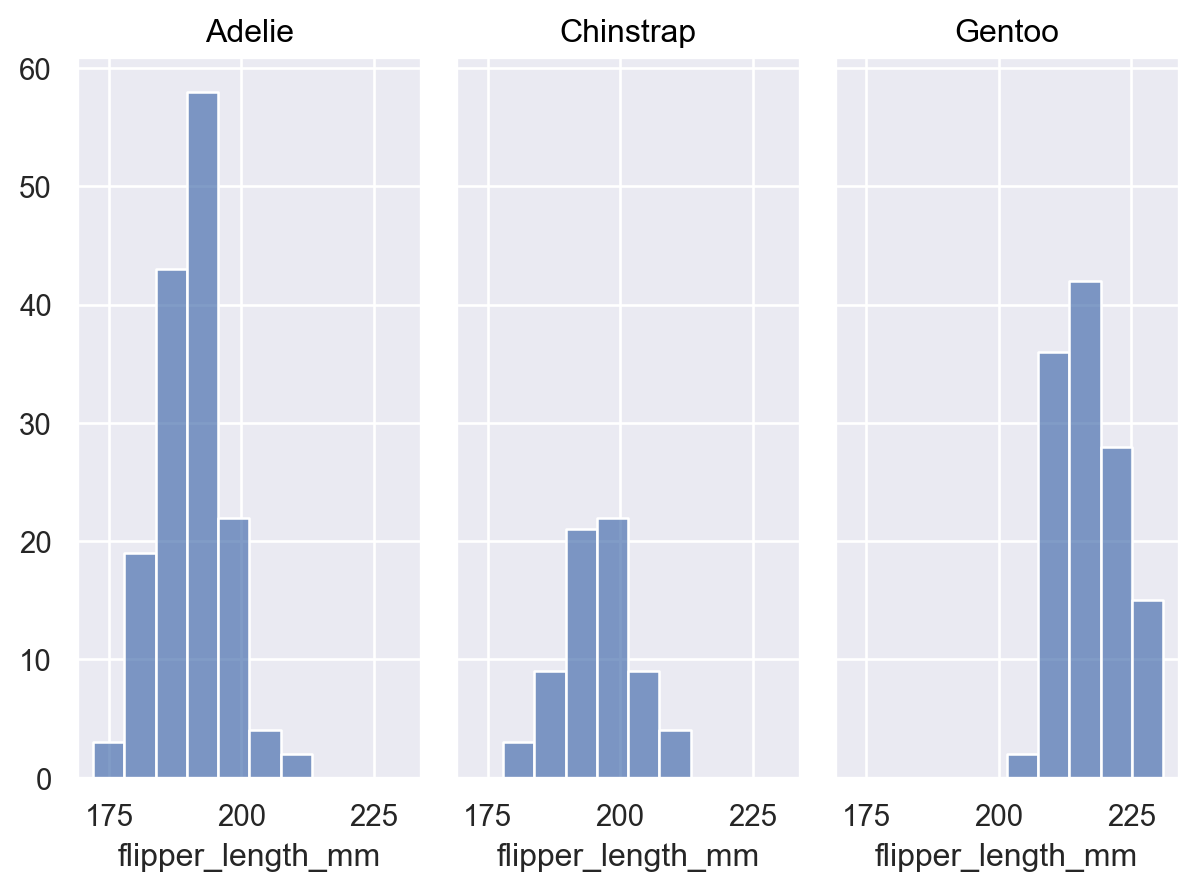

In [22]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)

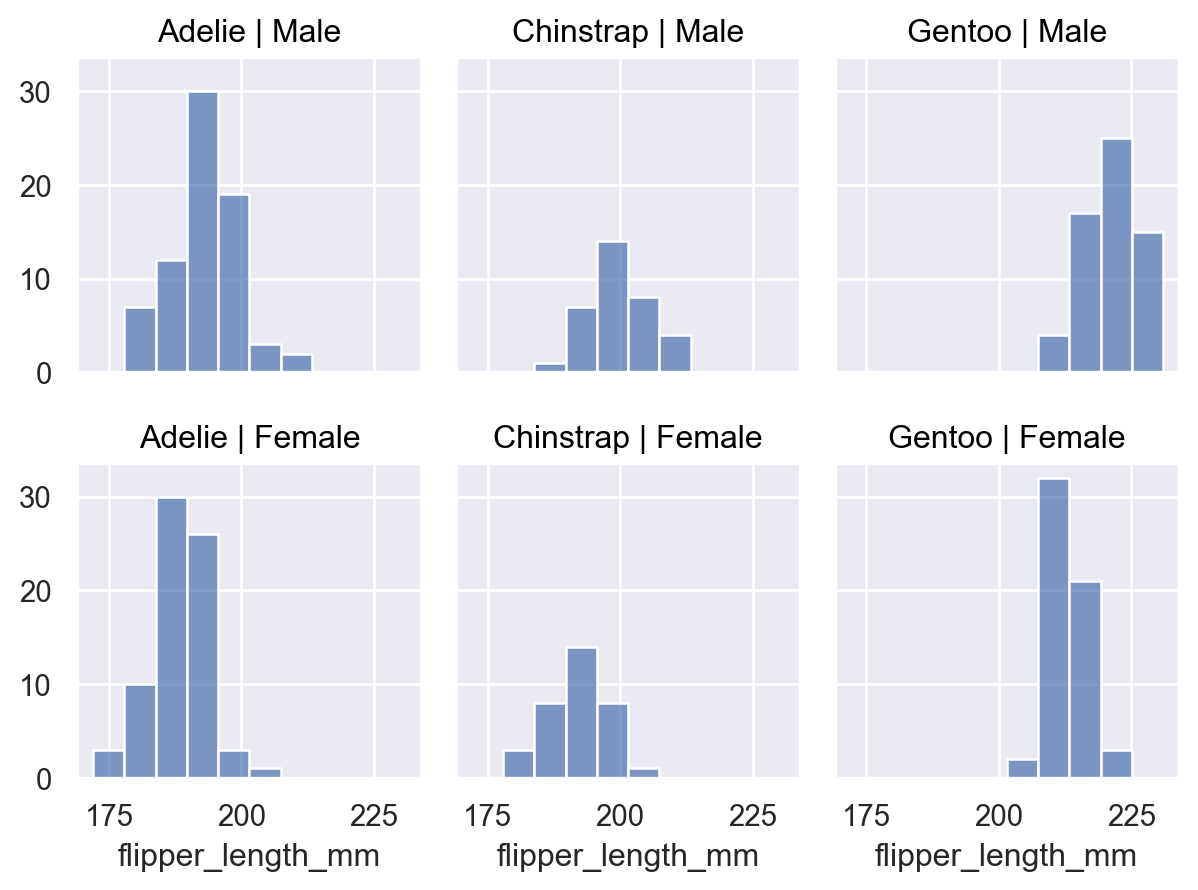

In [23]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

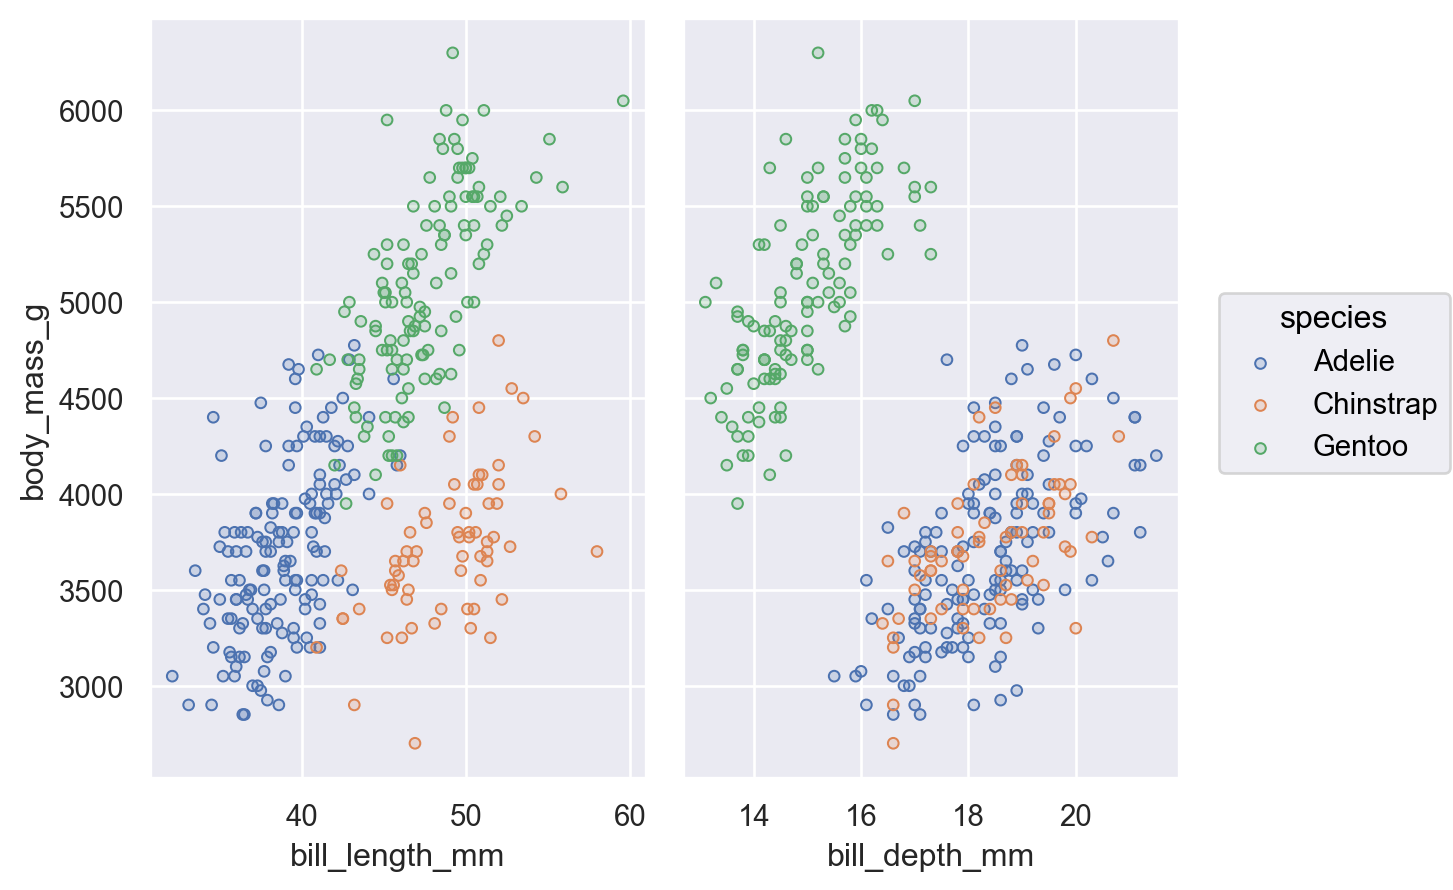

In [24]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

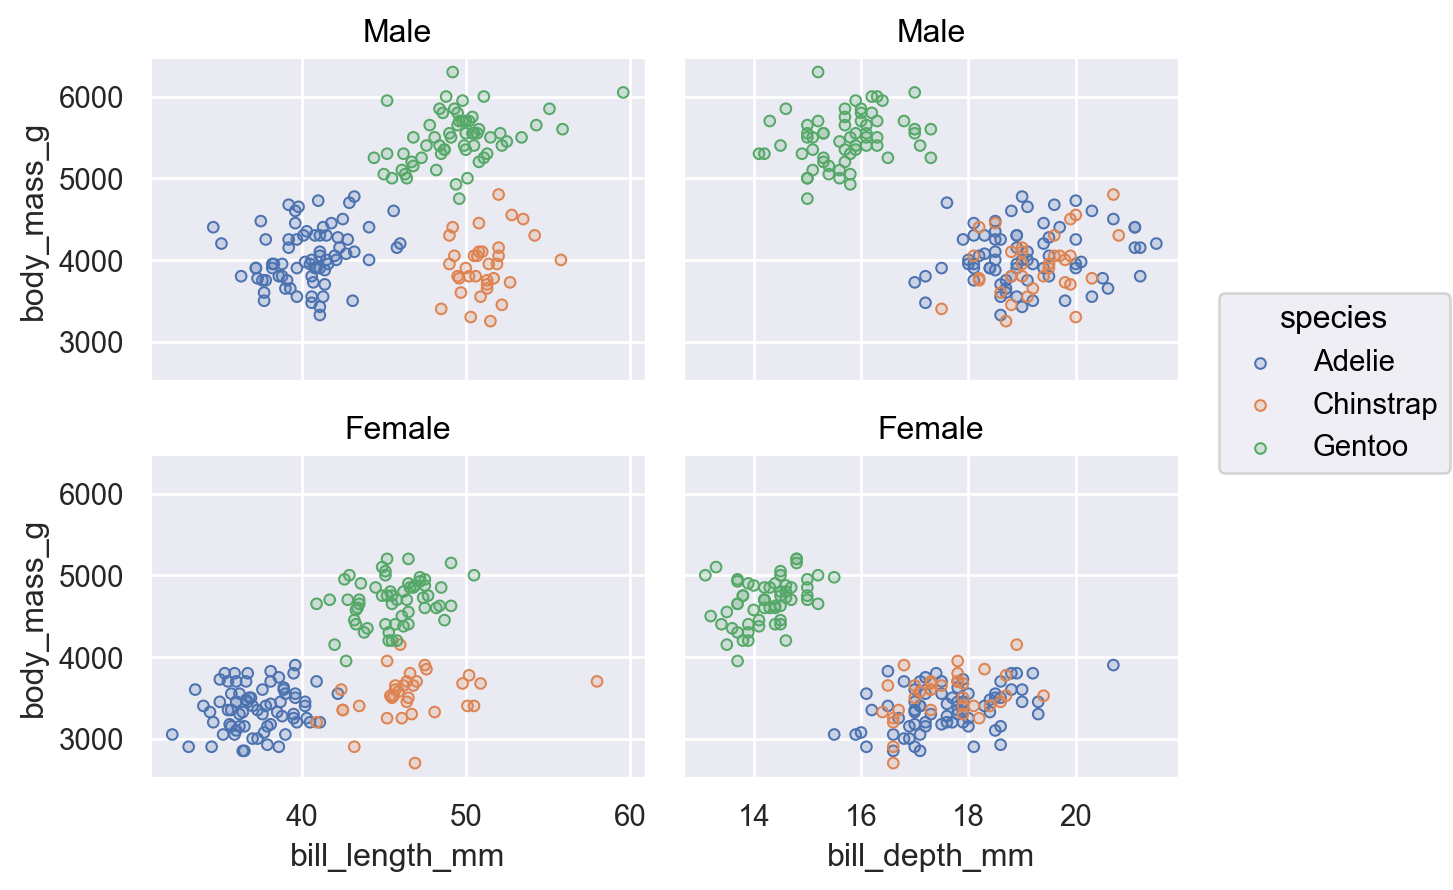

In [25]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

### Integrating with matplotlib
There may be cases where you want multiple subplots to appear in a figure with a more complex structure than what Plot.facet() or Plot.pair() can provide. The current solution is to delegate figure setup to matplotlib and to supply the matplotlib object that Plot should use with the Plot.on() method. This object can be either a matplotlib.axes.Axes, matplotlib.figure.Figure, or matplotlib.figure.SubFigure; the latter is most useful for constructing bespoke subplot layouts

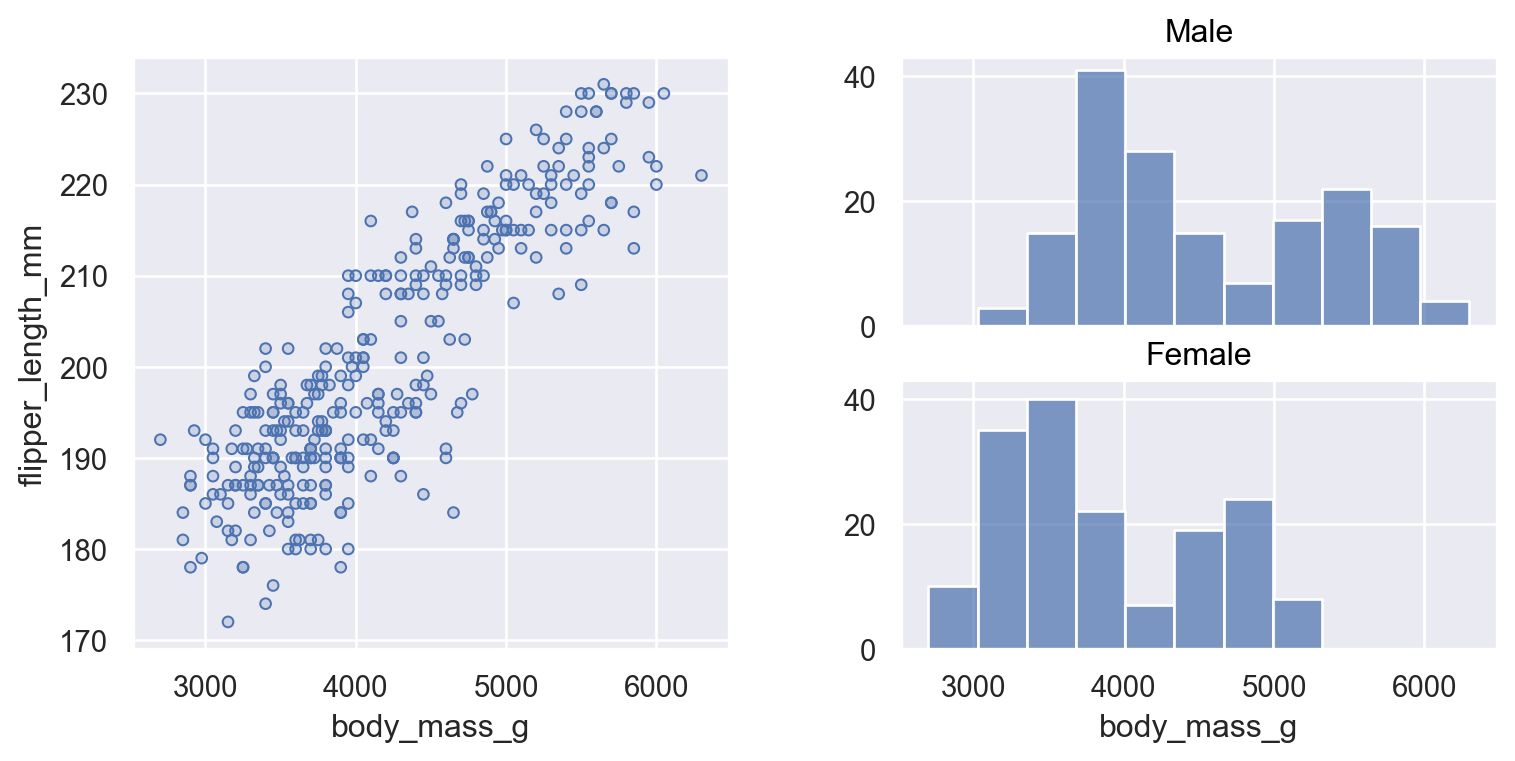

In [26]:
import matplotlib as mpl

f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

## Customizing the appearance
The new interface aims to support a deep amount of customization through Plot, reducing the need to switch gears and use matplotlib functionality directly. (But please be patient; not all of the features needed to achieve this goal have been implemented!)

### Parameterizing scales
All of the data-dependent properties are controlled by the concept of a Scale and the Plot.scale() method. This method accepts several different types of arguments. One possibility, which is closest to the use of scales in matplotlib, is to pass the name of a function that transforms the coordinates

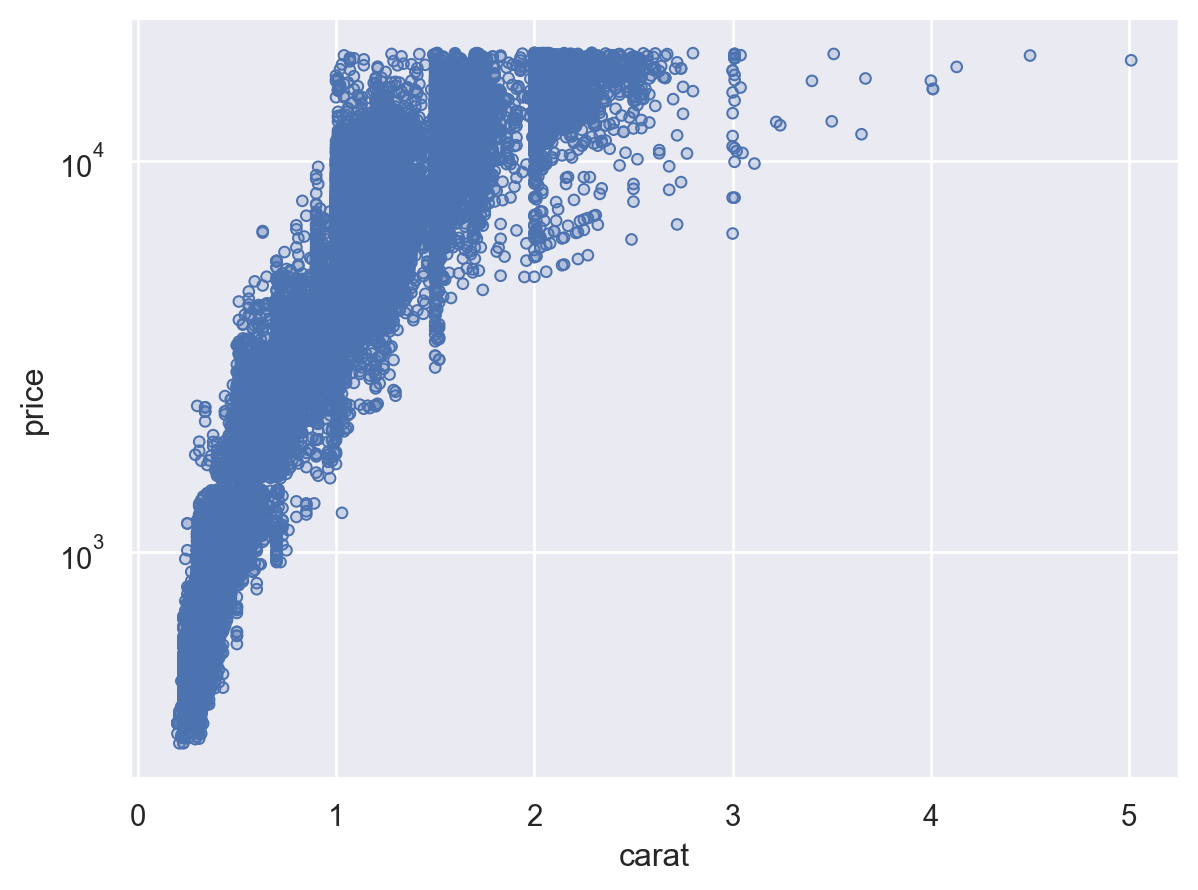

In [27]:
diamonds = sns.load_dataset("diamonds")

(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dots())
    .scale(y="log")
)

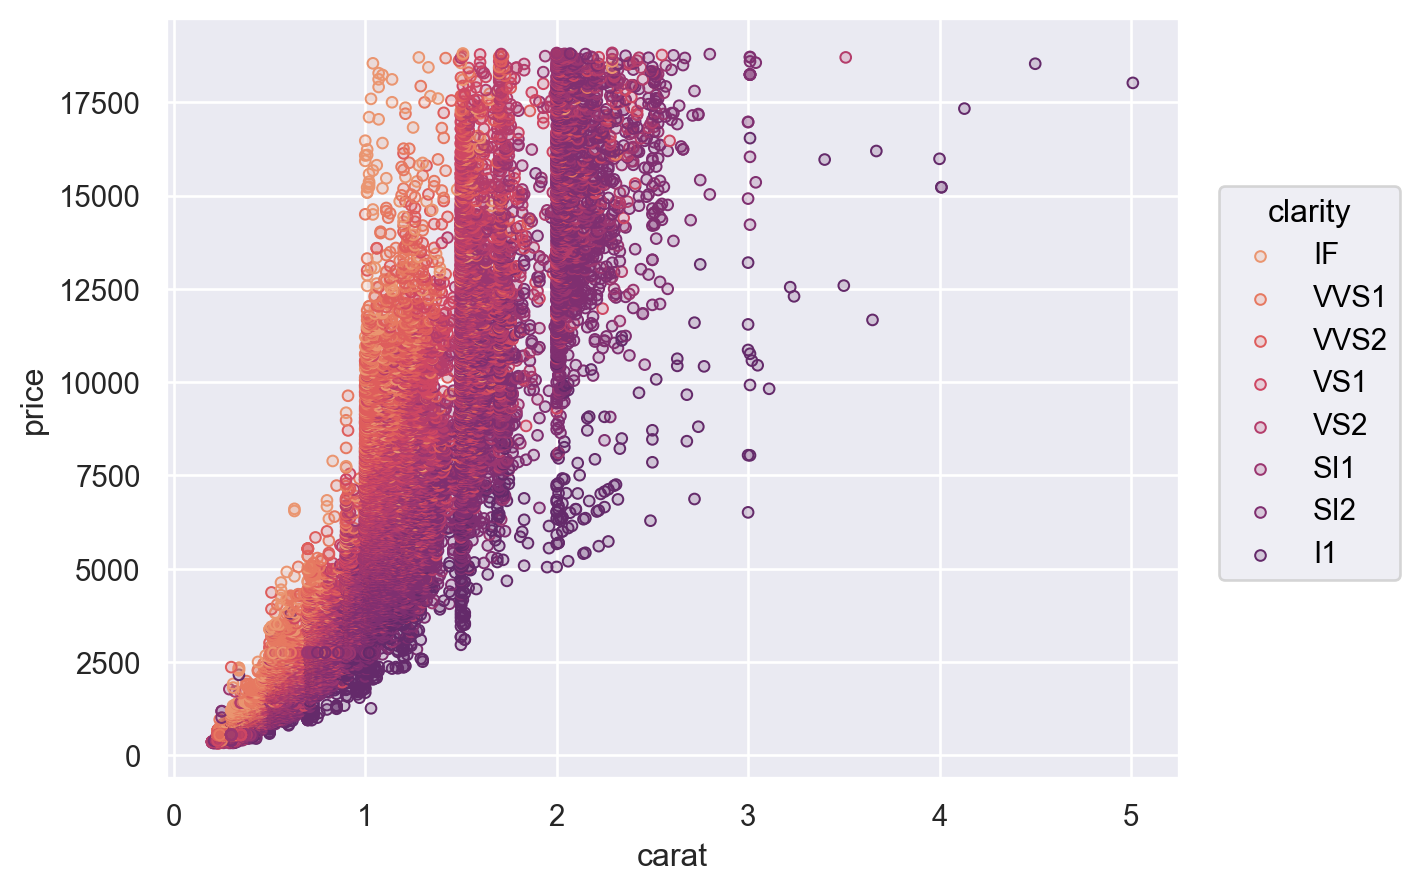

In [28]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity")
    .add(so.Dots())
    .scale(color="flare")
)

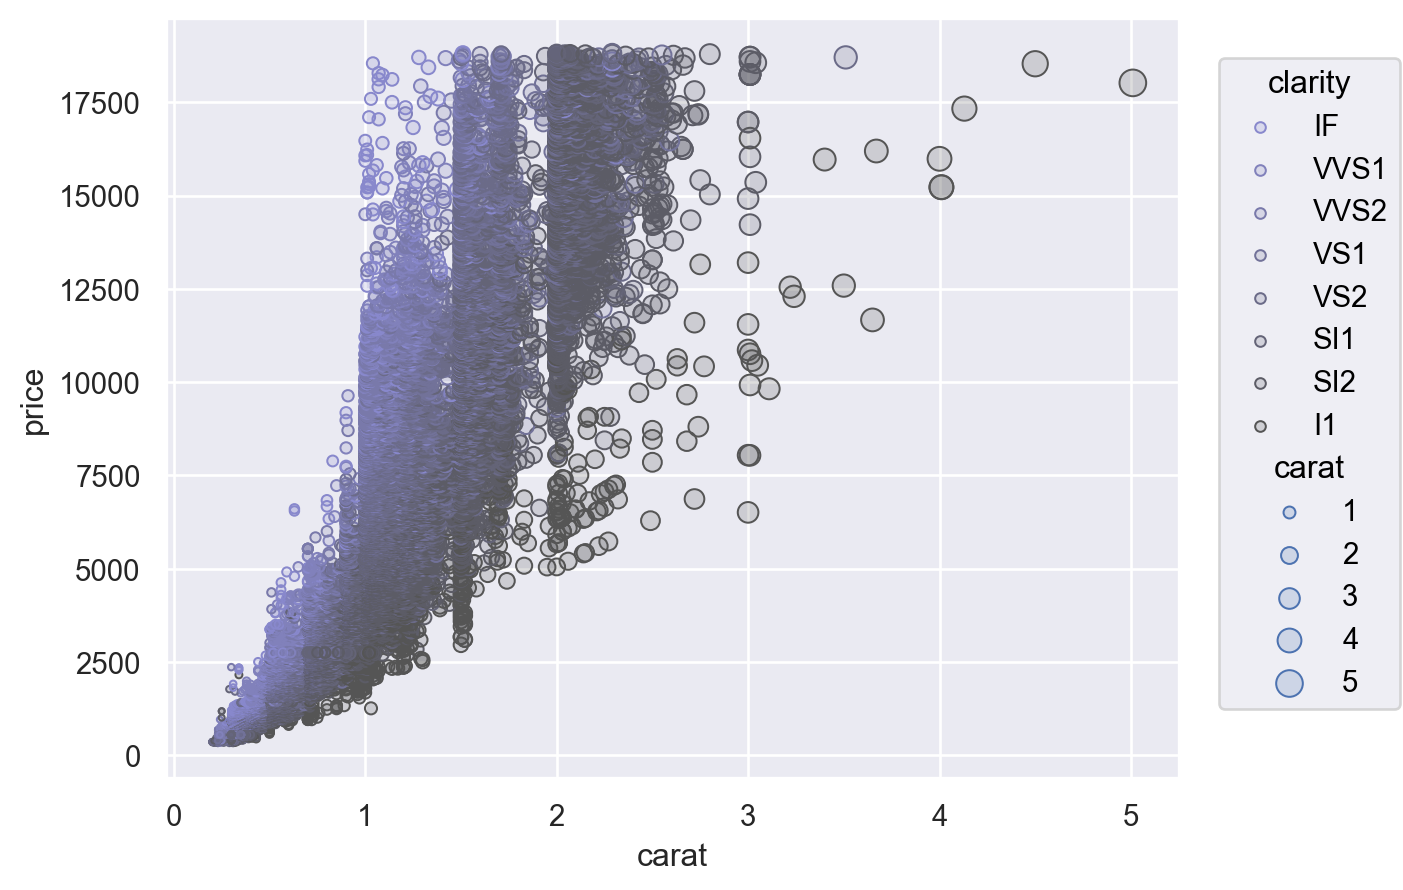

In [29]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity", pointsize="carat")
    .add(so.Dots())
    .scale(color=("#88c", "#555"), pointsize=(2, 10))
)

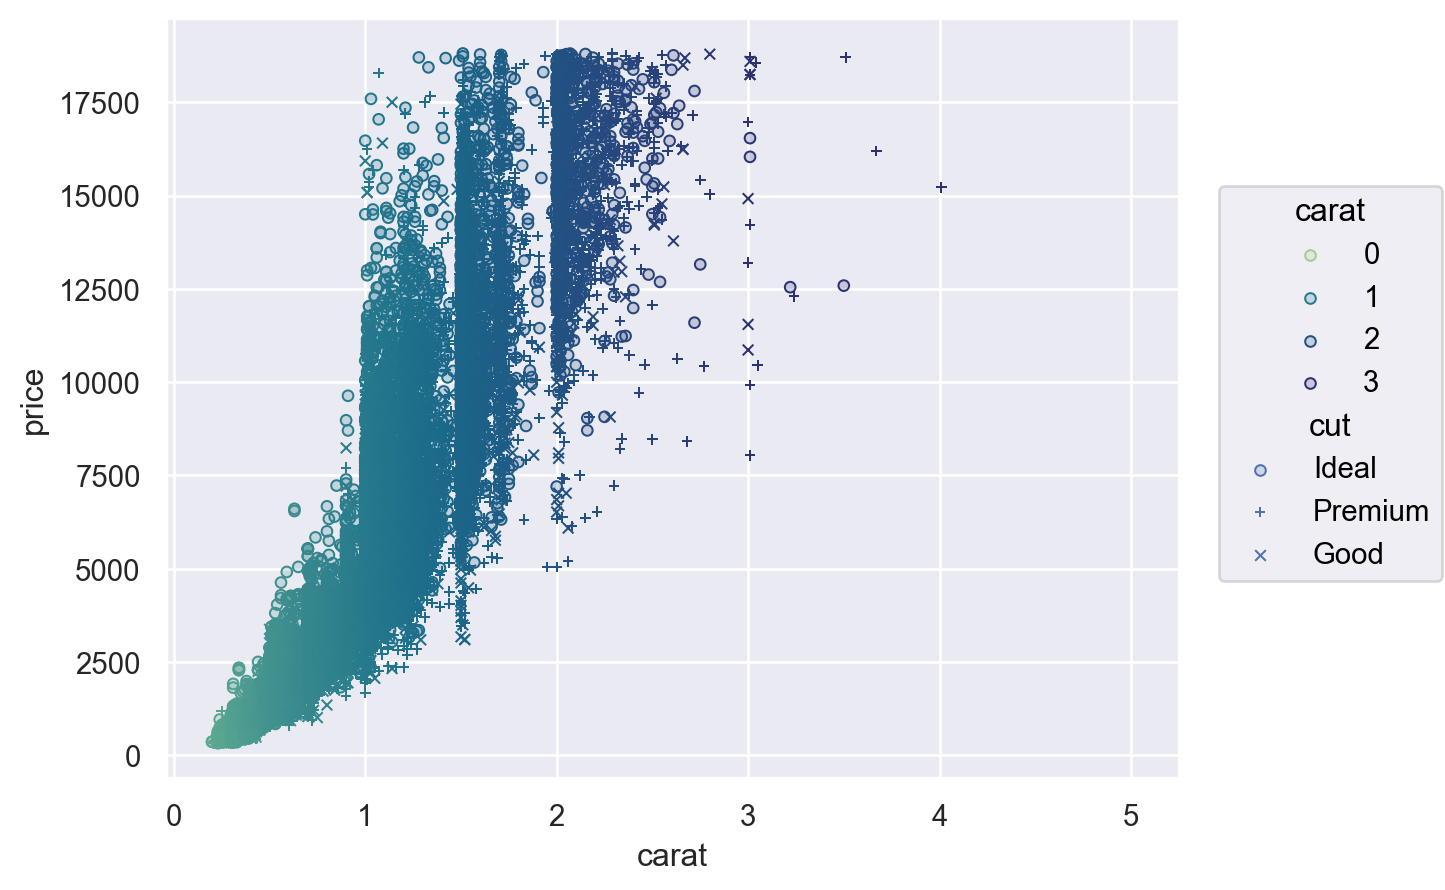

In [30]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat", marker="cut")
    .add(so.Dots())
    .scale(
        color=so.Continuous("crest", norm=(0, 3), trans="sqrt"),
        marker=so.Nominal(["o", "+", "x"], order=["Ideal", "Premium", "Good"]),
    )
)

### Customizing legends and ticks
The Scale objects are also how you specify which values should appear as tick labels / in the legend, along with how they appear. For example, the Continuous.tick() method lets you control the density or locations of the ticks, and the Continuous.label() method lets you modify the format

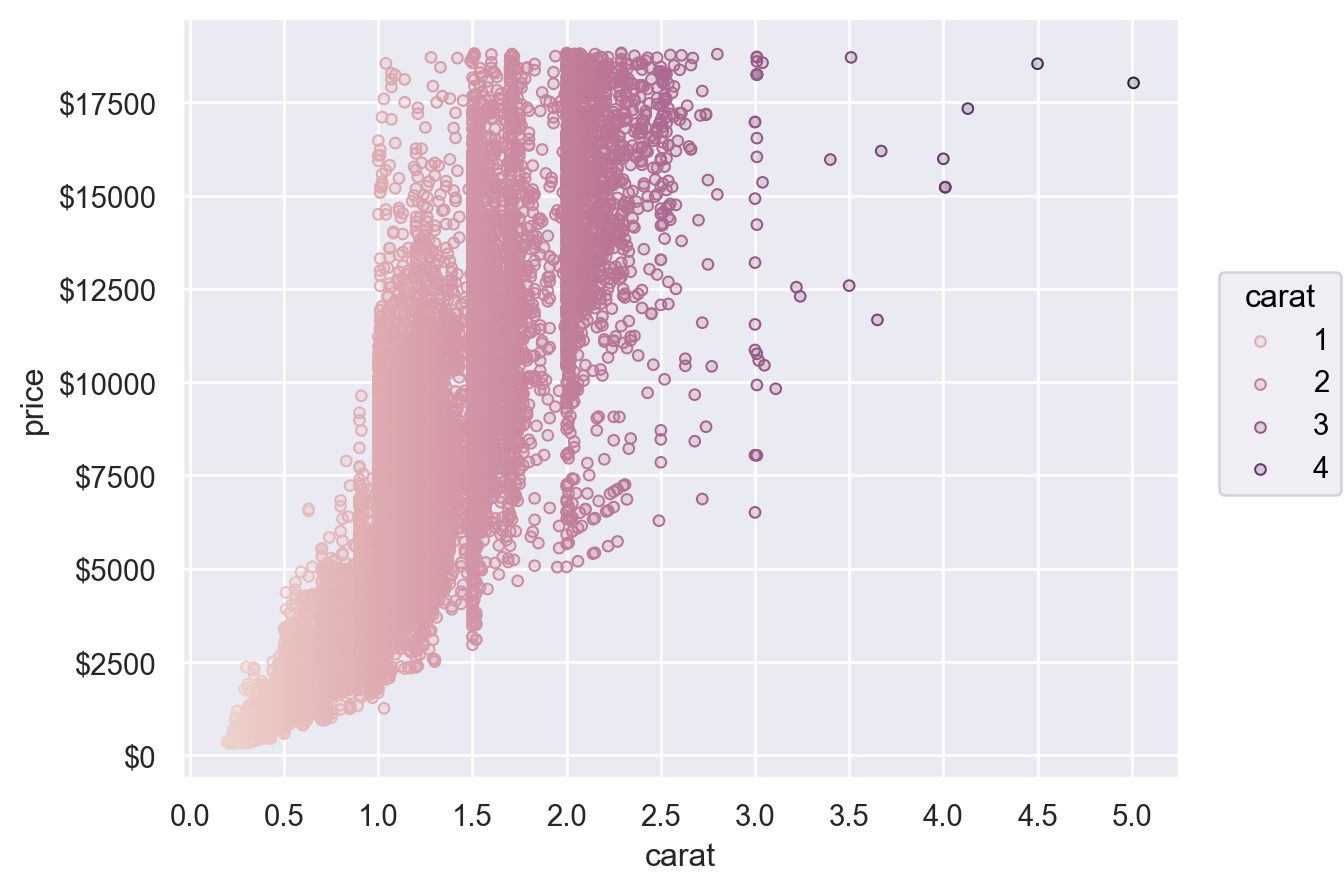

In [31]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:.0f}"),
        color=so.Continuous().tick(at=[1, 2, 3, 4]),
    )
)

### Customizing limits, labels, and titles
Plot has a number of methods for simple customization, including Plot.label(), Plot.limit(), and Plot.share()

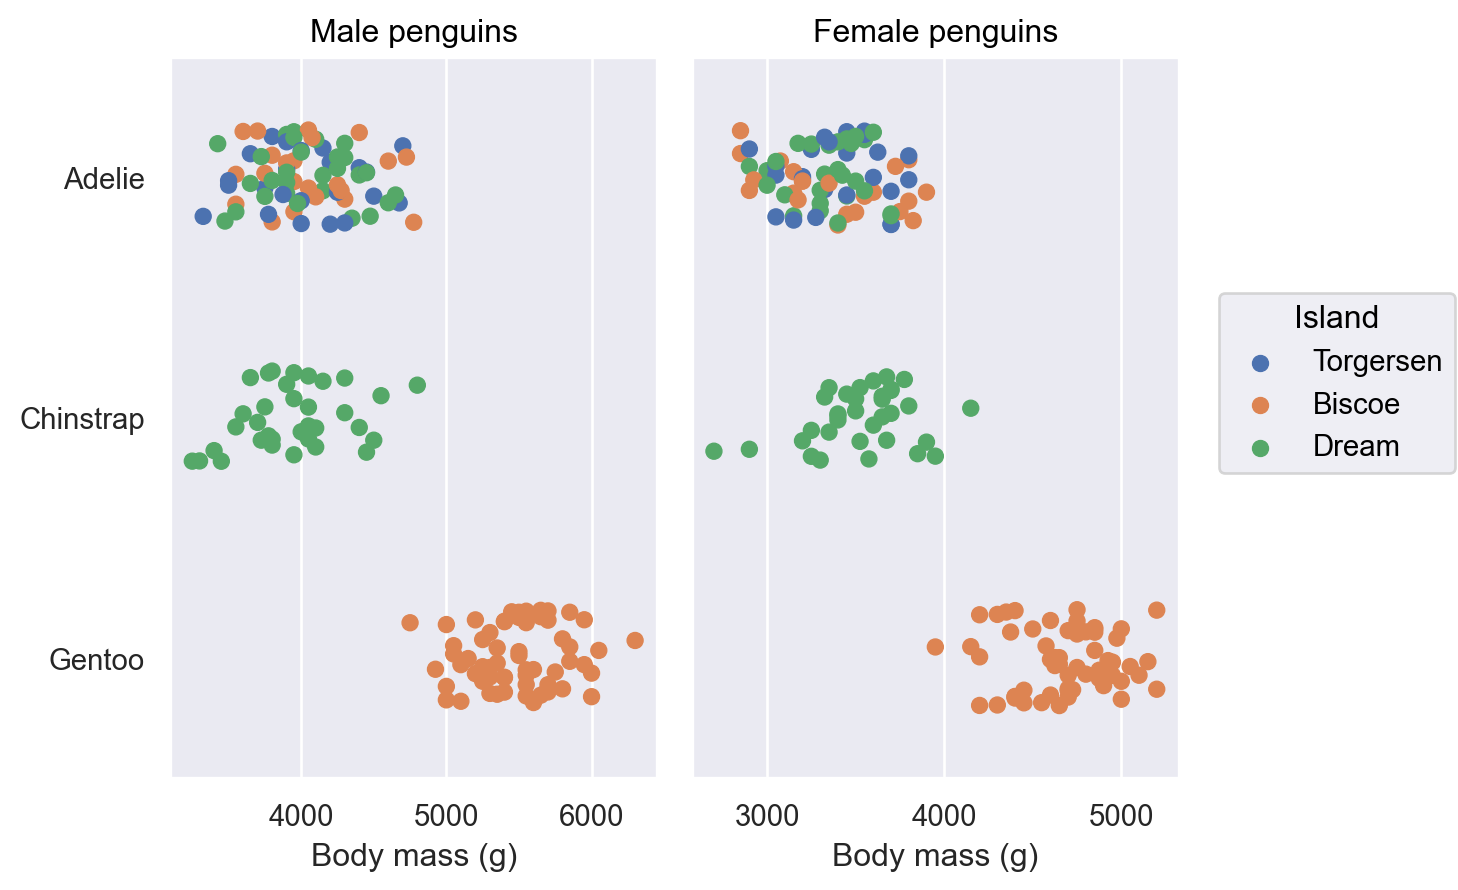

In [32]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)